In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

a = var("a")
b = var("b")

m = var("m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(a, "real")
assume(a > 0)
assume(b, "real")
assume(b > 0)

assume(m, "real")
assume(m >= 0)

#Propulsion and Energy Forum
#July 28-30, 2014, Cleveland, OH
#50th AIAA/ASME/SAE/ASEE Joint Propulsion Conference
#Anomalous Thrust Production from an RF Test Device
#Measured on a Low-Thrust Torsion Pendulum
#David A. Brady * , Harold G. White † , Paul March ‡ , James T. Lawrence § , and Frank J. Davies **
#NASA Lyndon B. Johnson Space Center, Houston, Texas 77058


#Tapered Cavity RF Evaluation and Testing, TE012 mode
#Prior to the TM211 evaluations, COMSOL® analysis indicated that the TE012 was an effective thrust generation
#mode for the tapered cavity thruster being evaluated, so this mode was explored early in the evaluation process.
#Figure 22 shows a test run at the TE012 mode with an operating frequency of 1880.4 MHz. The measured quality
#factor was ~22,000, with a COMSOL prediction of 21,817. The measured power applied to the test article was
#measured to be 2.6 watts, and the (net) measured thrust was 55.4 micronewtons. With an input power of 2.6 watts,
#correcting for the quality factor, the predicted thrust is 50 micronewtons. However, since the TE012 mode had
#numerous other RF modes in very close proximity, it was impractical to repeatedly operate the system in this mode,
#so the decision was made to evaluate the TM211 modes instead.

#E. Tapered Cavity Testing: Summary of Results
# Mode 
# Frequency (MHz)
# Quality Factor, Q 

# Input Power (W) 
# Peak Thrust (μN) 
# Mean Thrust (μN) 
# Number of Test Runs
# TM211 1932.6   7320  16.9  116.0   91.2  5
# TM211 1936.7 18,100  16.7   54.1   50.1  2
# TE012 1880.4 22,000   2.6   55.4   55.4  1

# Harrington, Roger F. (1961). Time-Harmonic Electromagnetic Fields. McGraw-Hill. ISBN 9780070267459.

# EEE TRANSACTIONS ON MICROWAVE THEORY AND TECHNIQUES, VOL. 54, NO. 4, APRIL 2006
# Two-Resonator Method for Measurement of Dielectric Anisotropy in Multilayer SamplesPlamen I. Dankov, Member, IEEE
# https://www.researchgate.net/publication/3131333_Two-resonator_method_for_measurement_of_dielectric_anisotropy_in_multilayer_samples

m_val = 1
n_val = 0
h_val = 0

E_mode = True
n_layers = 2

a_val = 12

In [4]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001):
    try:
        free_variable = func.variables()[0]
    except:
        free_variable = x
    #print("free_variable", free_variable)
    #print("func", func(1))
    L = []
    if b - a < tol:
        return L
    try:
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        x0 = find_root(func,a,b)
        #exec("print(func(" + preparse(str(free_variable)) + "=x0))")
        #print ("x0 =", x0, func(free_variable=x0))
        L.append(x0)
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        if 'f appears to have no zero on the interval' != str(ex):
            print(str(ex))
            print ("a = ", a, "b = ", b)
            print (func(free_variable=a), func(free_variable=b))
            exec("print(func(" + preparse(str(free_variable)) + "=a))")
            exec("print(func(" + preparse(str(free_variable)) + "=b))")
        pass
    return L

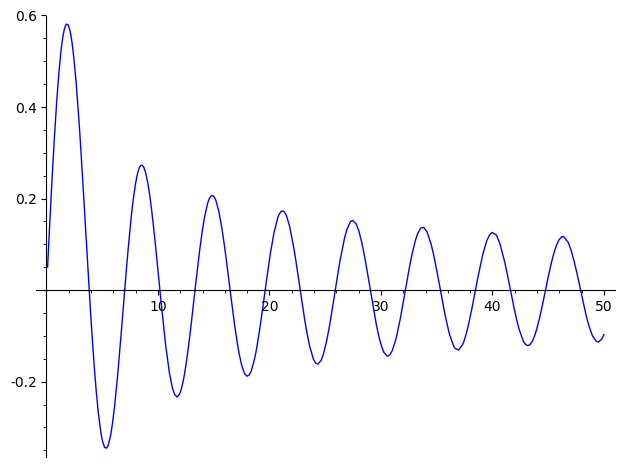

[3.831705970207552,
 7.015586669815619,
 10.173468135062722,
 13.323691936314223,
 16.470630050877634,
 19.615858510468243,
 22.760084380592772,
 25.90367208761827,
 29.046828534916855,
 32.189679910974405,
 35.33230755008384,
 38.474766234771614,
 41.61709421281445,
 44.75931899765282,
 47.90146088718542]

In [7]:
plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

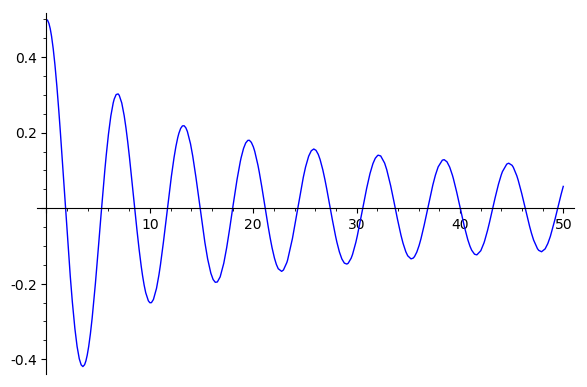

[1.8411837813406593,
 5.3314427735250325,
 8.536316366346286,
 11.706004902592063,
 14.863588633909105,
 18.015527862681804,
 21.16436985918879,
 24.311326857210776,
 27.457050571059245,
 30.601922972669094,
 33.746182898667385,
 36.88998740923681,
 40.03344405335064,
 43.17662896544882,
 46.31959756117407,
 49.462391139702774]

In [8]:
plot(bessel_J_d(m_val,x),0.1,50).show()
first_bessel_d_roots = find_root_recursive(bessel_J_d(m_val,x),0.1,50)
first_bessel_d_roots.sort()
first_bessel_d_roots

In [9]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("mu += [mu_" + str(i) +"]")

In [10]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("assume(epsilon_" + str(i) + ", 'real')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [11]:
sigma = []
for i in range(n_layers):
    exec("sigma_" + str(i) + "= var('sigma_" + str(i) + "')")
    exec("assume(sigma_" + str(i) + ", 'real')")
    exec("sigma += [sigma_" + str(i) +"]")

In [12]:
g = []
for i in range(n_layers):
    exec("g_" + str(i) + "= var('g_" + str(i) + "')")
    exec("assume(g_" + str(i) + ", 'real')")
    exec("g += [g_" + str(i) +"]")

In [13]:
h = []
for i in range(n_layers):
    exec("h_" + str(i) + "= var('h_" + str(i) + "')")
    exec("assume(h_" + str(i) + ", 'real')")
    exec("h += [h_" + str(i) +"]")

In [14]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [15]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [16]:
C_z = []
for i in range(n_layers):
    exec("C_z_" + str(i) + "= var('C_z_" + str(i) + "')")
    exec("assume(C_z_" + str(i) + ", 'real')")
    exec("C_z += [C_z_" + str(i) +"]")

In [17]:
D_z = []
for i in range(n_layers):
    exec("D_z_" + str(i) + "= var('D_z_" + str(i) + "')")
    exec("assume(D_z_" + str(i) + ", 'real')")
    exec("D_z += [D_z_" + str(i) +"]")

In [18]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

In [19]:
s = []
for i in range(n_layers):
    exec("s_" + str(i) + "= var('s_" + str(i) + "')")
    exec("assume(s_" + str(i) + ", 'real')")
    exec("s += [s_" + str(i) +"]")

$\vec{E} = \vec{E}\,e^{-i\,\omega\,t}$

$\vec{H} = \vec{H}\,e^{-i\,\omega\,t}$


$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$


$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E} \right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\left(\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} + i\,\frac{4\pi\omega}{c^2} \sigma \right)\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$



Ищем решение в виде

$E_{z}\left({\rho}, {\phi}, \mathit{z}\right) = E_{z}(\rho)\,E_{z}(\phi)\,E_{z}(z)$

подставляя в исходное уравнение

In [20]:
# подставляя в исходное уравнение 
if False:
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    H = ES.vector_field(
        function('H_rho_rho')(rho) * function('H_rho_phi')(phi) * function('H_rho_z')(zz),
        function('H_phi_pho')(rho) * function('H_phi_phi')(phi) * function('H_phi_z')(zz),
        function('H_z_rho')  (rho) * function('H_z_phi')  (phi) * function('H_z_z')  (zz),
        name='H')

    E = ES.vector_field(
        function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
        function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
        function('E_z_rho')  (rho) * function('E_z_phi')  (phi) * function('E_z_z')  (zz),
        name='E')

    E = ES.vector_field(
        function('E_rho')(rho,phi,zz),
        function('E_phi')(rho,phi,zz),
        function('E_z')(rho,phi,zz),
        name='E')
    
    H = ES.vector_field(
        function('H_rho')(rho,phi,zz),
        function('H_phi')(rho,phi,zz),
        function('H_z')(rho,phi,zz),
        name='H')
    
    #E = ES.vector_field(
    #    function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
    #    function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
    #    function('E_z_rho')  (rho) * cos(m*phi) * e^(I*k[0]*zz),
    #    name='E')
    
    from sage.manifolds.operators import curl, laplacian
    rot_rot_E = curl(curl(E))
    rot_rot_H = curl(curl(H))
    laplacian_E = laplacian(E)

    #print (rot_rot_E.display())
    #print (rot_rot_H.display())
    #print (laplacian_E.display())
    
    #eq_z = (rot_rot_E[3] - mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand()
    #display(Math(latex(eq_z.expr())))
    
    eq_z = (laplacian_E[3] + mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand().expr() == 0
    display(Math(latex(eq_z)))

we have 

$\frac{\epsilon \mu \omega^{2} E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right) + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)$


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming

$E_{z}(\phi) = sin(m\,\varphi + \psi_{m})$

and

$E_{z}(z) = e^{i\,k\,z}$

or

$E_{z}(z) = cos\left(k\,z\right)$
or
$E_{z}(z) = sin\left(k\,z\right)$

приходим к обыкновенному дифференциальному уравнению


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

assuming

$\kappa^2 = \frac{\mu \, \epsilon \, \omega^2}{c^2} - k^2$

we will receive equation of Bessel type

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$


In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega}\,i$ we have

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming for metals

$E_{z}(z) = e^{i\,k'\,z}$

with complex $k' = k + i\,s$

$E_{z}(z) = e^{i\,k\,z} \, e^{-s\,z}$

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k'^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} - k'^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$k'^2 
= \left(k + i\,s \right)^2
= k^2 - s^2 + 2\,i\,k\,s$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2}
+\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2}
- k^2 + s^2 - 2\,i\,k\,s
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$- 2\,i\,k\,s +\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} = 0 $

$ 2\,k\,s = \frac{4\pi\,\mu\,\sigma\,\omega}{c^2}$

assuming now

$
\kappa^2 = \frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2}
- k^2 + s^2
$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

Dielectrics

assuming for dielectrics

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega'\,t}$

with complex $\omega' = \omega - i\,\alpha$

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega\,t} \, e^{-\alpha\,t}$

In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega'}\,i$ we have

$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$



$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \, \omega'^2}{c^2} - k^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$\omega'^2 
= \left(\omega - i\,\alpha \right)^2
= \omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega'^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\omega'}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\omega - i\,\alpha \right)}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\alpha^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i = 0$

$2\pi\,\sigma = \epsilon_{\alpha\,\beta}\,\alpha$

$\alpha = \frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}$


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\alpha^2\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{2\,\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
+\frac{\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

assuming now

$
\kappa^2 = \frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

In [21]:
# исходя из вида дифференциальных уравнений для metal
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_metal = []
eq_s_metal = []
for i in range(n_layers):
    eq_kappa_metal += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 + s[i]^2 == kappa^2]
    eq_s_metal     += [4 * pi * mu[i] * sigma[i] * omega / c^2 == 2 * k[i] * s[i]]

display(Math(latex(eq_kappa_metal)))
display(Math(latex(eq_s_metal)))

eq_kappa_metal_s = []
for i in range(n_layers):
    eq_kappa_metal_s += [eq_kappa_metal[i].subs(solve(eq_s_metal[i],s[i]))]

display(Math(latex(eq_kappa_metal_s)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [23]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_dielectric = []
for i in range(n_layers):
    eq_kappa_dielectric += [mu[i] * epsilon[i] / c^2 * (omega^2 + (2*pi*sigma[i]/epsilon[i])^2) - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa_dielectric)))

<IPython.core.display.Math object>

In [24]:
if True:
    i_layer = 0
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    kk = var("kk")
    assume(kk, "real")
    
    assume(rho, "real")
    assume(phi, "real")
    assume(zz, "real")
    
    E1 = ES.vector_field(
        function('E1_rho')(rho,phi) * e^(I*kk*zz),
        function('E1_phi')(rho,phi) * e^(I*kk*zz),
        function('E1_z')  (rho,phi) * e^(I*kk*zz),
        name='E1')
    
    H1 = ES.vector_field(
        function('H1_rho')(rho,phi) * e^(I*kk*zz),
        function('H1_phi')(rho,phi) * e^(I*kk*zz),
        function('H1_z')  (rho,phi) * e^(I*kk*zz),
        name='H1')
    
    from sage.manifolds.operators import curl, laplacian
    rot_E1 = curl(E1)
    rot_H1 = curl(H1)
    
    eq_rot_E1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_E1 += [ (I * omega * mu[i_layer] / c * H1[j].expr() == rot_E1[j].expr()).expand() ]
    display(Math(latex(eq_rot_E1)))
    
    eq_rot_H1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_H1 += [ (- I * omega / c * epsilon[i_layer] * E1[j].expr() == rot_H1[j].expr()).expand() ]
    display(Math(latex(eq_rot_H1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
E_phi_sol_1 = solve(eq_rot_E1[0], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_1)))
E_phi_sol_2 = solve(eq_rot_H1[1], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_2)))

In [26]:
H_rho_sol_1 = solve(eq_rot_E1[0], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_1)))
H_rho_sol_2 = solve(eq_rot_H1[1], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_2)))

In [27]:
E_phi_solution = solve(E_phi_sol_1[0].subs(H_rho_sol_2),function('E1_phi')(rho,phi) )
#display(Math(latex(E_phi_sol)))
E_phi_solution = solve(E_phi_sol_2[0].subs(H_rho_sol_1),function('E1_phi')(rho,phi) )
display(Math(latex(E_phi_solution)))

<IPython.core.display.Math object>

In [28]:
H_rho_solution = solve(H_rho_sol_1[0].subs(E_phi_sol_2),function('H1_rho')(rho,phi) )
#display(Math(latex(H_rho_sol)))
H_rho_solution = solve(H_rho_sol_2[0].subs(E_phi_sol_1),function('H1_rho')(rho,phi) )
display(Math(latex(H_rho_solution)))

<IPython.core.display.Math object>

In [29]:
E_rho_sol_1 = solve(eq_rot_E1[1], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_1)))
E_rho_sol_2 = solve(eq_rot_H1[0], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_2)))

In [30]:
H_phi_sol_1 = solve(eq_rot_E1[1], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_1)))
H_phi_sol_2 = solve(eq_rot_H1[0], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_2)))

In [31]:
E_rho_solution = solve(E_rho_sol_1[0].subs(H_phi_sol_2),function('E1_rho')(rho,phi) )
#display(Math(latex(E_rho_sol)))
E_rho_solution = solve(E_rho_sol_2[0].subs(H_phi_sol_1),function('E1_rho')(rho,phi) )
display(Math(latex(E_rho_solution)))

<IPython.core.display.Math object>

In [32]:
H_phi_solution = solve(H_phi_sol_1[0].subs(E_rho_sol_2),function('H1_phi')(rho,phi) )
#display(Math(latex(H_phi_sol)))
H_phi_solution = solve(H_phi_sol_2[0].subs(E_rho_sol_1),function('H1_phi')(rho,phi) )
display(Math(latex(H_phi_solution)))

<IPython.core.display.Math object>

In [33]:
H_z = []
H_z_a = [] # sin(k[i]*z) = imag_part()
H_z_b = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        H_z += [lambda rh,ph,z, i=i : 0]
        H_z_a += [lambda rh,ph,z, i=i : 0]
        H_z_b += [lambda rh,ph,z, i=i : 0]
        pass
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph)]
        H_z_a += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        H_z_b += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(B_z[i]*e^(I*k[i]*z)) * cos(m*ph)]

In [34]:
E_z = [] 
E_z_c = [] # sin(k[i]*z) = imag_part()
E_z_d = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*sin(k[i]*z) + D_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_z_c += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        E_z_d += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( D_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]
        E_z_c += [lambda rh,ph,z, i=i: 0]
        E_z_d += [lambda rh,ph,z, i=i: 0]
        pass

In [35]:
var("B")*(e^(I * kk * z)).real_part()

B*cos(kk*z)

In [36]:
# + pi/2
var("B")*(I*e^(I * kk * z)).real_part()

-B*sin(kk*z)

In [37]:
# - pi/2
var("B")*(-I*e^(I * kk * z)).real_part()

B*sin(kk*z)

In [38]:
var("A")*(e^(I * kk * z)).imag_part()

A*sin(kk*z)

In [39]:
# + pi/2
var("A")*(I*e^(I * kk * z)).imag_part()

A*cos(kk*z)

In [40]:
# - pi/2
var("A")*(-I*e^(I * kk * z)).imag_part()

-A*cos(kk*z)

In [41]:
def make_field_formula_old(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('H1_z(rho, phi)', 'H_z[i](rh,ph,z)') \
            .replace('E1_z(rho, phi)', 'E_z[i](rh,ph,z)') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]')
    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print(s)
    #print(i, i_layer)
    f = []
    exec("f += [" + preparse(s) + "]")
    #print(f)
    s = str_replacing(str(f[0]), i, i_layer)
    return s

In [42]:
def expand_re_im_operands(s, expand_real_operands, expand_imag_operands):
    from sage.symbolic.operators import add_vararg, mul_vararg
    s_factor = s.factor()
    #print("s_factor", s_factor)
    s_factor_operator = s_factor.operator()
    #print("s_factor.operator()", s_factor_operator)
    if mul_vararg != s_factor_operator:
        print("mul_vararg != s_factor.operator()", s_factor_operator)
        print("re_im(v_expanded)", v_expanded)
        raise ("mul_vararg != s_factor.operator()", s_factor_operator)

    current_s_has_image_part = False
    current_s_has_exp_of_image_part = False

    s_factor_real_operands = ()
    s_factor_imag_operands = ()
    s_factor_complex_exp_operands = ()
    for m in s_factor.operands():
        #print("operand", m, m.operator())
        if bessel_J == m.operator():
            #print("bessel_J == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (m,)
        elif 'bessel_j' == str(m.operator()):
            #print("bessel_j == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (bessel_J(*m.operands()),)
        elif exp == m.operator():
            #print("exp == m.operator() m.operands():",m, m.operands())
            current_exp_has_image_part = False
            for m_operand in m.operands():
                #print("m_operand", m_operand)
                m_operand_imag_part = m_operand.imag_part()
                #print("m_operand_imag_part", m_operand_imag_part)
                #print("type(m_operand_imag_part)", type(m_operand_imag_part))
                #print("type(0)", type(0))
                m_operand_imag_part_is_0 = 0 is m_operand_imag_part
                #print("m_operand_imag_part_is_0", m_operand_imag_part_is_0)
                m_operand_imag_part_eq_0 = 0 == m_operand_imag_part
                bool_m_operand_imag_part_eq_0 = bool(m_operand_imag_part_eq_0)
                #print("m_operand_imag_part_eq_0", m_operand_imag_part_eq_0)
                #print("type(m_operand_imag_part_eq_0)", type(m_operand_imag_part_eq_0))
                if False == bool_m_operand_imag_part_eq_0:
                    #print("current_s_has_exp_of_image_part")
                    current_s_has_exp_of_image_part = True
                    current_exp_has_image_part = True
            if True == current_exp_has_image_part:
                #print("True == current_exp_has_image_part")
                s_factor_complex_exp_operands += (m,)
            else:
                #print("not True == current_exp_has_image_part")
                s_factor_real_operands += (m,)
        else:
            #print("not bessel, not exp", m)
            m_imag_part = m.imag_part()
            #print("m_imag_part", m_imag_part)
            #print("type(m_imag_part)", type(m_imag_part))
            #print("type(0)", type(0))
            m_imag_part_is_0 = 0 is m_imag_part
            #print("m_imag_part_is_0", m_imag_part_is_0)
            m_imag_part_eq_0 = 0 == m_imag_part
            bool_m_imag_part_eq_0 = bool(m_imag_part_eq_0)
            #print("m_imag_part_eq_0", m_imag_part_eq_0)
            #print("bool(m_imag_part_eq_0)", bool(m_imag_part_eq_0))
            #print("type(m_imag_part_eq_0)", type(m_imag_part_eq_0))
            if False == bool_m_imag_part_eq_0:
                #print("current_s_has_image_part = True")
                current_s_has_image_part = True
                s_factor_imag_operands += (I,)
                s_factor_real_operands += (m/I,)
            else:
                #print("not current_s_has_image_part = True")
                s_factor_real_operands += (m,)

    if True == current_s_has_exp_of_image_part:
        #print("current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul_complex_exp = mul_vararg(*(s_factor_imag_operands + s_factor_complex_exp_operands))
            re_out = mul_vararg(*((imag_part_mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((imag_part_mul_complex_exp.imag_part(),) + s_factor_real_operands))
        else:
            #print("not True == current_s_has_image_part")
            mul_complex_exp = mul_vararg(*(s_factor_complex_exp_operands))
            re_out = mul_vararg(*((mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((mul_complex_exp.imag_part(),) + s_factor_real_operands))
    else:
        #print("not current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul = mul_vararg(*(s_factor_imag_operands))
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            #print("imag_part_mul", imag_part_mul)
            #print("real_part_mul", real_part_mul)
            re_out = 0
            im_out = (imag_part_mul/I) * real_part_mul
        else:
            #print("not True == current_s_has_image_part")
            im_out = 0
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            re_out = real_part_mul
    #print("re_out", re_out)
    #print("im_out", im_out)
    expand_real_operands += (re_out,)
    expand_imag_operands += (im_out,)
    
    return (expand_real_operands, expand_imag_operands)


def re_im(v_expanded):
    from sage.symbolic.operators import add_vararg, mul_vararg
    expand_real_operands = ()
    expand_imag_operands = ()    
    if add_vararg == v_expanded.operator():
        for s in v_expanded.operands():
            (expand_real_operands, expand_imag_operands) = expand_re_im_operands(s, expand_real_operands, expand_imag_operands)
    elif mul_vararg == v_expanded.operator():
        (expand_real_operands, expand_imag_operands) = expand_re_im_operands(v_expanded, expand_real_operands, expand_imag_operands)
    else:
        print("add_vararg, mul_vararg != v_expanded.operator()", v_expanded.operator())
        print("re_im(v_expanded)", v_expanded)
        return (v_expanded.real_part(), v_expanded.imag_part())

    if 0 == len(expand_real_operands) and  0 == len(expand_imag_operands):
        return (0, 0)
    if 0 == len(expand_real_operands) and  0 != len(expand_imag_operands):
        return (0, (add_vararg(*expand_imag_operands)).factor())
    if 0 != len(expand_real_operands) and  0 == len(expand_imag_operands):
        return ((add_vararg(*expand_real_operands)).factor(), 0)
    return ((add_vararg(*expand_real_operands)), (add_vararg(*expand_imag_operands)))

def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v
    #return v.real_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return re

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0
    #return v.imag_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return im

In [43]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [44]:
def make_field_formula(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]') \
            .replace('bessel_j', 'bessel_J')

    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print("s =", s)
    
    s_im = s \
        .replace('H1_z(rh, ph)', 'H_z_a[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_c[i](rh,ph,z)')
    s_re = s \
        .replace('H1_z(rh, ph)', 'H_z_b[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_d[i](rh,ph,z)')
    s_all = s \
        .replace('H1_z(rh, ph)', 'H_z[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z[i](rh,ph,z)')
    #print("s_im =", s_im)
    #print("s_re =", s_re)
    #print("s_all =", s_all)
    #print(s)
    #print(i, i_layer)
    f_Im = []
    f_Re = []
    f_im = []
    f_re = []
    f = []
    exec("f_im += [" + preparse("(" + s_im + ").imag_part()") + "]")
    exec("f_re += [" + preparse("(" + s_re + ").real_part()") + "]")
    exec("f_Im += [" + Preparse("Im(" + s_im + ")") + "]")
    exec("f_Re += [" + Preparse("Re(" + s_re + ")") + "]")
    exec("f += [" + Preparse(s_all) + "]")
    #print(f)
    s1 = str_replacing(str(f[0]), i, i_layer)
    s2 = str_replacing(str((f_im[0]+f_re[0]).factor()), i, i_layer)
    s3 = str_replacing(str((f_Im[0]+f_Re[0]).factor()), i, i_layer)
    return (s1, s2, s3)

In [45]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_rho_solution, i, i_layer)
    print("")
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    print(bessel_J_d(m,kappa*rh))


-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)

-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

-1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)


In [46]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_phi_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

-I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

-(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)



In [47]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_rho_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)

(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)



In [48]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_phi_solution, i, i_layer)
    print(s1)
    print("")
    print(s2)
    print("")
    print(s3)
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)

-1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)



In [49]:
r = var('r') #rho
p = var('p') #phi
assume(r, "real")
assume(r > 0)
assume(p, "real")

In [50]:
E_rh = []
for i in range(n_layers):
    if E_mode:
        #E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_rh += [lambda r,p,z, i=i: -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa]
    else:
        #E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(c*kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*cos(k[i]*z) - A_z[i]*sin(k[i]*z)) * sin(m*ph)]
        E_rh += [lambda r,p,z, i=i : -I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]

In [51]:
E_ph = []
for i in range(n_layers):
    if E_mode:
        #E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * sin(m*ph)]
        E_ph += [lambda r,p,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)]
    else:
        # E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*rh)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # 1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        E_ph += [lambda r,p,z, i=i : - I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*r)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*p)]


In [52]:
E_z = []
for i in range(n_layers):
    if E_mode:
        E_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*p)]
    else:
        E_z += [lambda r,p,z, i=i: 0]        

In [53]:
H_rh = []
for i in range(n_layers):
    if E_mode:
        #H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*cos(k[i]*z) - C_z[i]*sin(k[i]*z)) * sin(m*ph)]
        H_rh += [lambda r,p,z, i=i : I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]
    else:
        H_rh += [lambda r,p,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*r)*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*p)]        
        # -1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

In [54]:
H_ph = []
for i in range(n_layers):
    if E_mode:
        #H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        H_ph += [lambda r,p,z, i=i : -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)]
    else:
        #H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*sin(k[i]*z) + A_z[i]*cos(k[i]*z)) * sin(m*ph)]
        # -(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)
        H_ph += [lambda r,p,z, i=i: m*k[i]/(kappa^2*r) * bessel_J  (m,kappa*r)*(B_z[i]*sin(k[i]*z) - A_z[i]*cos(k[i]*z)) * sin(m*p)]
        

In [55]:
H_z = []
for i in range(n_layers):
    if E_mode:
        H_z += [lambda r,p,z, i=i : 0]
    else:
        H_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*p)]                

In [56]:
E_rh[0](r,p,z)

-1/2*(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa

In [57]:
E_ph[0](r,p,z)

-(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)

In [58]:
if 1 < n_layers:
    E_rh[1](rh,ph,z)

In [59]:
if 1 < n_layers:
    E_ph[1](rh,ph,z)

In [60]:
E_z[0](rh,ph,z)

(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*cos(m*varphi)

In [61]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [62]:
make_test_with_maxwell_equations = True

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \left( \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

In [63]:
def test_with_maxwell_equations(i_layer):
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E0 = ES.vector_field(
        E_rh[i_layer](rho,phi,zz),
        E_ph[i_layer](rho,phi,zz),
        E_z[i_layer](rho,phi,zz),
        name='E0')

    H0 = ES.vector_field(
        H_rh[i_layer](rho,phi,zz),
        H_ph[i_layer](rho,phi,zz),
        H_z[i_layer](rho,phi,zz),
        name='H0')

    from sage.manifolds.operators import curl
    rot_E0 = curl(E0)
    print("rot_E0 =")#, rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_E0[j].expr())))
        #display(Math(latex(mu[i_layer] * I * omega / c * H0[j].expr())))
        print("")
    
    rot_H0 = curl(H0)
    print("rot_H0 =", rot_H0.display())
    print("")
    
    rot_rot_E0 = curl(rot_E0)
    print("rot_rot_E0 =", rot_rot_E0.display())
    print("")
    
    rot_rot_H0 = curl(rot_H0)
    print("rot_rot_H0 =", rot_rot_H0.display())
    print("")
    
    mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * E0
    mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
    
    print("mu_epsilon_omega2_c2_E0 =", mu_epsilon_omega2_c2_E0.display())
    print("")
    print("mu_epsilon_omega2_c2_H0 =", mu_epsilon_omega2_c2_H0.display())
    print("")
    
    eq_rot_E = []
    eq_rot_H = []
    eq_rot_rot_E = []
    eq_rot_rot_H = []
    for j in ES.irange():
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    return (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H)

In [64]:
if make_test_with_maxwell_equations:
    (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H) = test_with_maxwell_equations(i_layer = 0)

rot_E0 =


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


rot_H0 = curl(H0) = -1/2*((-I*C_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) + I*C_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*omega*cos(m*phi)*cos(k_0*zz) + (I*D_z_0*epsilon_0*k_0*bessel_J(m + 1, kappa*rho) - I*D_z_0*epsilon_0*k_0*bessel_J(m - 1, kappa*rho))*omega*cos(m*phi)*sin(k_0*zz))/(c*kappa) e_rho + (I*C_z_0*epsilon_0*k_0*m*omega*bessel_j(m, kappa*rho)*cos(k_0*zz)*sin(m*phi) - I*D_z_0*epsilon_0*k_0*m*omega*bessel_J(m, kappa*rho)*sin(m*phi)*sin(k_0*zz))/(c*kappa^2*rho) e_phi + 1/4*((-4*I*D_z_0*epsilon_0*m^2*omega*bessel_j(m, kappa*rho)*cos(m*phi) + (I*D_z_0*epsilon_0*kappa^2*bessel_j(m + 2, kappa*rho) + I*D_z_0*epsilon_0*kappa^2*bessel_j(m - 2, kappa*rho) - 2*I*D_z_0*epsilon_0*kappa^2*bessel_j(m, kappa*rho))*omega*rho^2*cos(m*phi) + (-2*I*D_z_0*epsilon_0*kappa*bessel_j(m + 1, kappa*rho) + 2*I*D_z_0*epsilon_0*kappa*bessel_j(m - 1, kappa*rho))*omega*rho*cos(m*phi))*cos(k_0*zz) + (-4*I*C_z_0*epsilon_0*m^2*omega*bessel_j(m, kappa*rho)*cos(m*phi) + (I*C_z_0*epsilon_0*kappa^2*bessel

In [65]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_E[j])))
        print("")
    if not E_mode:
        plot(eq_rot_E[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()        

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 53 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'unable to convert 2.220446049250313e-16*I to float; use abs() or real_part() as desired'


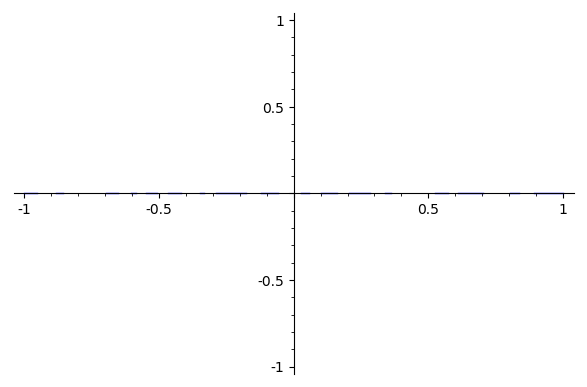

In [66]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_H[j])))
        print("")
    if E_mode:
        plot(eq_rot_H[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [67]:
if make_test_with_maxwell_equations:
    for j in range(3):
        print(eq_rot_rot_E[j])
        print("")

True

True

-1/4*(kappa^2*rho^2*bessel_J(m + 2, kappa*rho) + kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 2*kappa^2*rho^2*bessel_J(m, kappa*rho) - 2*kappa*rho*bessel_J(m + 1, kappa*rho) + 2*kappa*rho*bessel_J(m - 1, kappa*rho) - 4*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(D_z_0*cos(k_0*zz) + C_z_0*sin(k_0*zz))*cos(m*phi)/(kappa^2*rho^2) == 0



In [68]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Ez = (eq_rot_rot_E[2])
        display(Math(latex(eq_rot_rot_Ez)))

<IPython.core.display.Math object>

In [69]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [70]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


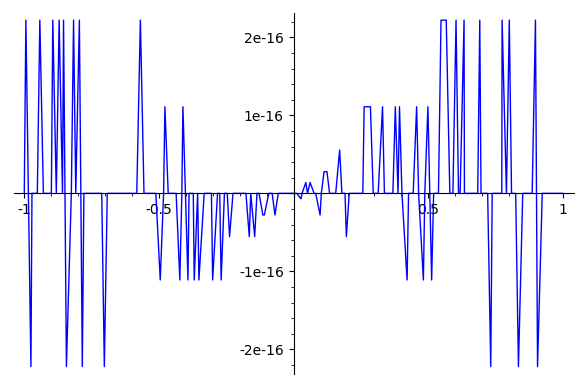

In [71]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [72]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Erh = (eq_rot_rot_E[0])
        display(Math(latex(eq_rot_rot_Erh)))

In [73]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

In [74]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

In [75]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [76]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Eph = (eq_rot_rot_E[1])
        display(Math(latex(eq_rot_rot_Eph)))

In [77]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

In [78]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

In [79]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [80]:
if make_test_with_maxwell_equations:
    display(Math(latex(eq_rot_rot_H)))

<IPython.core.display.Math object>

In [81]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hrh = (eq_rot_rot_H[0])
        display(Math(latex(eq_rot_rot_Hrh)))

<IPython.core.display.Math object>

In [82]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hph = (eq_rot_rot_H[1])
        display(Math(latex(eq_rot_rot_Hph)))

<IPython.core.display.Math object>

In [83]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hrh.lhs().operator())

<function mul_vararg at 0x7f16adf5cc20>


In [84]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hph.lhs().operator())

<function mul_vararg at 0x7f16adf5cc20>


In [85]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

<IPython.core.display.Math object>

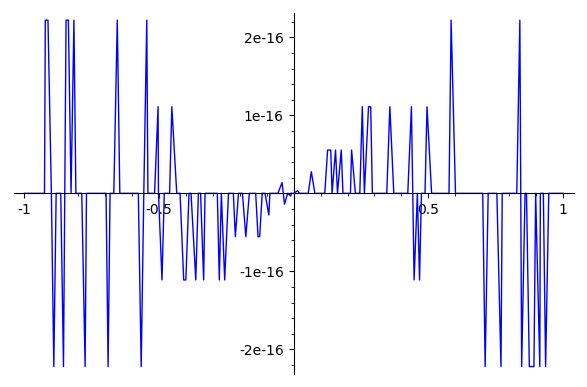

In [86]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [87]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

<IPython.core.display.Math object>

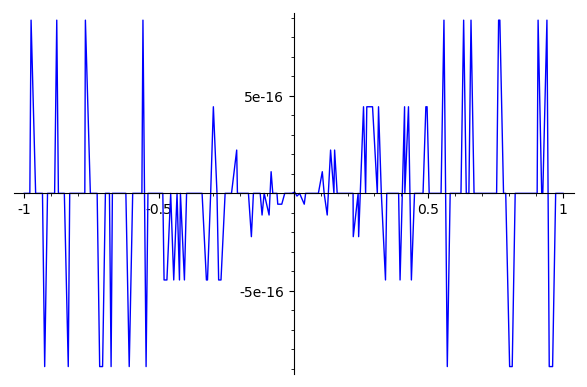

In [88]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [89]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Hz = (eq_rot_rot_H[2])
        display(Math(latex(eq_rot_rot_Hz)))

In [90]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Hz.lhs().operator())

In [91]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

In [92]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [93]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda r,p,z, i=i: " + str(diff(E_z[i](r,p,z),p)/r - E_ph[i](r,p,z).diff(z)) +"]"))

In [94]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda r,p,z, i=i: " + str(E_rh[i](r,p,z).diff(z)-diff(E_z[i](r,p,z),rh)) +"]"))

In [95]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda r,p,z, i=i: " + str(((r*E_ph[i](r,p,z)).diff(r) - E_rh[i](r,p,z).diff(p))/r) +"]"))

In [96]:
rotE_ph[0](rh,ph,z)

1/2*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa

In [97]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [98]:
rotE_rh[0](rh,ph,z)

-(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*sin(m*varphi)/rho - (D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho)

In [99]:
rotE_z[0](rh,ph,z)

0

In [100]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda r,p,z, i=i : rotE_rh[i](r,p,z)*c/(I*omega *mu[i])]

In [101]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda r,p,z, i=i : rotE_ph[i](r,p,z)*c/(I*omega *mu[i])]

In [102]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda r,p,z, i=i : rotE_z[i](r,p,z)*c/(I*omega *mu[i])]

In [103]:
H_rh_[0](rh,ph,z).factor()

I*(k_0^2 + kappa^2)*(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*c*m*bessel_j(m, kappa*rho)*sin(m*varphi)/(kappa^2*mu_0*omega*rho)

In [104]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [105]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [106]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

-1/2*I*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*c*k_0*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))/(kappa*mu_0*omega)

In [107]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [108]:
H_z_[0](rh,ph,z)

0

In [109]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [110]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,sum(h)) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,sum(h)) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

if E_mode:
    var_begin = C_z[0]
    var_end   = C_z[n_layers - 1]
else:
    var_begin = B_z[0]
    var_end   = B_z[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [111]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda r, p, z, i=i : " + str(E_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [112]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda r, p, z, i=i : " + str(E_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [113]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda r, p, z, i=i : " + str(E_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [114]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda r, p, z, i=i : " + str(H_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [115]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda r, p, z, i=i : " + str(H_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [116]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda r, p, z, i=i : " + str(H_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [117]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [118]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [119]:
if 2 < n_layers:
    display(Math(latex(E_rh[2](rh,ph,z))))
    display(Math(latex(E_rho[2](rh,ph,z))))

In [120]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [121]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [122]:
if 2 < n_layers:
    display(Math(latex(E_z[2](rh,ph,z))))
    display(Math(latex(E_zz[2](rh,ph,z))))

In [123]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [124]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
if 2 < n_layers:
    display(Math(latex(H_rh[2](rh,ph,z))))
    display(Math(latex(H_rho[2](rh,ph,z))))

In [126]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [127]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [128]:
if 2 < n_layers:
    display(Math(latex(H_ph[2](rh,ph,z))))
    display(Math(latex(H_phi[2](rh,ph,z))))

In [129]:
if 0 < n_layers:
    display(Math(latex(H_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

In [130]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [131]:
if 2 < n_layers:
    display(Math(latex(H_zz[2](rh,ph,z))))

In [132]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [133]:
all_vars = []
if E_mode:
    for i in range(n_layers):
        all_vars += [C_z[i], D_z[i]]
else:
    for i in range(n_layers):
        all_vars += [A_z[i], B_z[i]]
all_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [134]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [135]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [136]:
bch = []
bc =  []
for i  in range (n_layers-1):
    if E_mode:
        bc += [(E_rho[i](rh,ph, sum([h[i] for i in range(i+1)])) == E_rho[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(E_phi[i](rh,ph, sum([h[i] for i in range(i+1)])) == E_phi[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(epsilon[i] * E_z[i](rh,ph,sum([h[i] for i in range(i+1)])) == epsilon[i+1]*E_z[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,sum([h[i] for i in range(i+1)])) == H_phi [i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, sum([h[i] for i in range(i+1)])) == H_rho[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, sum([h[i] for i in range(i+1)])) == H_phi[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph,sum([h[i] for i in range(i+1)])) == mu[i+1]*H_z[i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph,sum([h[i] for i in range(i+1)])) == E_phi [i+1](rh,ph,sum([h[i] for i in range(i+1)]))).subs(boundary_conductor)]

In [137]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [138]:
bch

[-1/2*I*D_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h_0*k_0)*cos(m*varphi)/(c*kappa) == -1/2*(I*D_z_1*cos(h_0*k_1) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [139]:
all_eqs = bc \
        + boundary_conductor

#display(Math(latex(all_eqs)))

In [140]:
M = GenerateMatrix(all_eqs, all_vars)

In [141]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [142]:
M.nrows(), M.ncols(), len(all_vars)

(5, 4, 4)

In [143]:
M.rank()

4

In [144]:
reduced_M = reduceDependedRows(M)


M.nrows() 5
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 2, 3, 4)


In [145]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [146]:
reduced_M.pivots()

(0, 1, 2, 3)

In [147]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [148]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 4
M.ncols() 4
M.rank() 4
len(vars) 4
M.pivots() = (0, 1, 2, 3)


In [149]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(4, 4, 4)

In [150]:
reduced_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [151]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [152]:
reduced_reduced_M

[                                                                                                                                                                0                                                                1/2*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/kappa                                                                                                                                                                 0 1/2*k_1*(cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - sin(h_0*k_1))*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa]
[                                                                                                                                                                0                                                                                                       epsilon_0*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)                          

In [153]:
type(reduced_reduced_M)

<class 'sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense'>

In [154]:
reduced_reduced_M.det()

1/2*epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_j(m -

In [155]:
exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [156]:
display(Math(latex(reduced_reduced_M_det)))

<IPython.core.display.Math object>

In [157]:
reduced_reduced_M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [158]:
M_det  = reduced_reduced_M_det

In [159]:
M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [160]:
# display(Math(latex(M_det)))

In [161]:
M_det_num = M_det.numerator()

In [162]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin

In [163]:
M_det_num.variables()

(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1, kappa, m, rho, varphi)

In [164]:
M_det.full_simplify().numerator()

-(epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) - epsilon_1*k_0*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) + epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*sin(h_1*k_1) - epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h_0*k_0)*sin(h_1*k_1))*cos(m*varphi)^2

In [165]:
M_det_num_expand = M_det_num.expand()

In [166]:
M_det_num_expand.operator()

<function add_vararg at 0x7f16af610f80>

In [167]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)

-epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)

-epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1)

epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1)

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_

In [168]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin

In [169]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1))*(bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho))*bessel_J(m, kappa*rho)*cos(m*varphi)^2

In [170]:
M_det_num_factor.operator()

<function mul_vararg at 0x7f16adf5cc20>

In [171]:
M_det_num_factor.operands()

[epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),
 bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho),
 bessel_J(m, kappa*rho),
 cos(m*varphi)^2]

In [172]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
    print ("")
    
M_det_num_factor_operands

epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1)
(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1)

bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho)
(kappa, m, rho)

bessel_J(m, kappa*rho)
(kappa, m, rho)

cos(m*varphi)^2
(m, varphi)



(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),)

In [173]:
M_det_num_factor_operands

(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),)

In [174]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [175]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [176]:
M_det_num.variables()

(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1)

In [177]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h[i]*k[i]))).full_simplify().expand()

In [178]:
M_det_num

epsilon_0*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + epsilon_1*cos(h_1*k_1)/(k_1*sin(h_1*k_1))

In [179]:
disp_eq = M_det_num == 0

In [180]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [181]:
bch

[-1/2*I*D_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h_0*k_0)*cos(m*varphi)/(c*kappa) == -1/2*(I*D_z_1*cos(h_0*k_1) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [182]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [183]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch[i].subs(solve (bc[0], C_z[1])), D_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch[i].subs(solve (bc[0], B_z[1])), A_z[i+1])[0].full_simplify ().factor () ]
bchs.reverse()

In [184]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [185]:
bcs = []
for i in range(n_layers-1):
    if E_mode:
        bcs +=  solve (bc[3*i], C_z[i+1])
    else:
        bcs +=  solve (bc[3*i], B_z[i+1])
bcs

[]

In [186]:
b_s = [h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers):
    b_s += [h[i] == g[i]*b]
    
b_s

[h_0 == -b*(g_1 - 1), h_1 == b*g_1]

In [187]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda r, p, z, i=i : E_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [188]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda r, p, z, i=i : E_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [189]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda r, p, z, i=i : E_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [190]:
H_rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda r, p, z, i=i : H_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [191]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda r, p, z, i=i : H_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [192]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda r, p, z, i=i : H_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [193]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [194]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [195]:
if 2 < n_layers:
    display(Math(latex(E_rho_s [2](rh,ph,z))))

In [196]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [197]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [198]:
if 2 < n_layers:
    display(Math(latex(E_phi_s [2](rh,ph,z))))

In [199]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [200]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [201]:
if 2 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[2](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[2](rh,ph,z))))

In [202]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [203]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [204]:
if 2 < n_layers:
    display(Math(latex(H_rho_s[2](rh,ph,z))))

In [205]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [206]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [207]:
if 2 < n_layers:
    display(Math(latex(H_phi_s[2](rh,ph,z))))

In [208]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

In [209]:
disp_eq

epsilon_0*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + epsilon_1*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [210]:
if E_mode:
    bessel_root_1 = first_bessel_roots[n_val]
else:
    bessel_root_1 = first_bessel_d_roots[n_val]

bessel_root_1

3.831705970207552

In [211]:
kappa_d1 = bessel_root_1/a

In [212]:
#sgs
# https://iopscience.iop.org/article/10.1149/1.2113993/pdf
# DC and ac electrical conductivities of silicon dioxide thermally grown on p‐ (boron‐doped) and n‐type (phosphorous‐doped) silicon have been measured in the temperature range of 25°–1100°C. 
# Total dc conductivities varied from 10−9 to 10−16 Ω−1cm−1
# sigma_sgse = 9*10^9 * sigma_SI

# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == a_val, mu[0] == 1,  epsilon[0] == 2.468^2, sigma[0] == 9*10^9 * 10 ^-9]

if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.67^2, sigma[1] == 9*10^9 * 10 ^-9]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[1] == 1, epsilon[1] == 1.487^2, sigma[1] == 9*10^9 * 10 ^-9]
    
if 2 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[2] == 1, epsilon[2] == 1.487^2, sigma[2] == 9*10^9 * 10 ^-9]

#if 3 < n_layers:
#    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
#    digit_values += [mu[3] == 1, epsilon[3] == 1.487^2, sigma[3] == 9*10^9 * 10 ^-9]
    
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
print(omega_value[0].rhs().n())

2.98046134067856e15


In [213]:
epsilon_d = []
mu_d = []

for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(digit_values)]
    mu_d      += [mu[i].subs(digit_values)]

In [214]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [215]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.1019581294591958,
 2.21435767505208e9*pi^2 - k_1^2 == 0.1019581294591958]

In [216]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [217]:
disp_eq_d

6.09102400000000*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + 2.21116900000000*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [218]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [219]:
k_values

[k_0 == 1/13*sqrt(2061735010415/2*pi^2 - 1793397073/104080146),
 k_1 == sqrt(2721445582639/1229*pi^2 - 10611817/104080146)]

In [220]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [221]:
k_values_d

[k_0 == 245362.362944717, k_1 == 147833.806198643]

In [222]:
disp_eq_d

6.09102400000000*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + 2.21116900000000*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [223]:
disp_eq_s = disp_eq_d.subs(k_values_d).subs(kappa == kappa_d1)

In [224]:
disp_eq_s

0.0000248246060516314*cos(245362.362944717*h_0)/sin(245362.362944717*h_0) + 0.0000149571269039023*cos(147833.806198643*h_1)/sin(147833.806198643*h_1) == 0

In [225]:
disp_eq_brakes_dict = dict()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print (operand2.variables())
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, lambda_d)
            operand_denominator_roots.sort()
            print(operand_denominator_roots)
            key = str(operand2.variables()[0])
            print("key =", key)
            if key in disp_eq_brakes_dict.keys():
                for rt in operand_denominator_roots:
                    if rt not in disp_eq_brakes_dict[key]:
                        disp_eq_brakes_dict[key] += [rt]
            else:
                disp_eq_brakes_dict[key] = operand_denominator_roots

            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            print ("")
    else:
        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
        operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, lambda_d)
        operand_denominator_roots.sort()
        print(operand_denominator_roots)
        key = str(operand_denominator.variables()[0])
        print("key =", key)
        if key in disp_eq_brakes_dict.keys():
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes_dict[key]:
                    disp_eq_brakes_dict[key] += [rt]
        else:
            disp_eq_brakes_dict[key] = operand_denominator_roots

        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        #    M_det_num_factor_operands += (operand,)
        print ("")

for key in disp_eq_brakes_dict.keys():
    disp_eq_brakes_dict[key].sort()

0.0000248246060516314*cos(245362.362944717*h_0)/sin(245362.362944717*h_0)
(h_0,)
operand_denominator sin(245362.362944717*h_0)
operand_denominator_operator sin
operand_denominator_variables (h_0,)
[1.2803889789313938e-05, 2.5607779730234244e-05, 3.841166927755635e-05, 5.121555915575706e-05]
key = h_0

0.0000149571269039023*cos(147833.806198643*h_1)/sin(147833.806198643*h_1)
(h_1,)
operand_denominator sin(147833.806198643*h_1)
operand_denominator_operator sin
operand_denominator_variables (h_1,)
[2.1250840817355155e-05, 4.250168123924944e-05]
key = h_1



In [226]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [227]:
disp_eq_brakes_dict

{'h_0': [1.2803889789313938e-05,
  2.5607779730234244e-05,
  3.841166927755635e-05,
  5.121555915575706e-05],
 'h_1': [2.1250840817355155e-05, 4.250168123924944e-05]}

In [228]:
#disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

In [229]:
disp_eq_s.lhs()

0.0000248246060516314*cos(245362.362944717*h_0)/sin(245362.362944717*h_0) + 0.0000149571269039023*cos(147833.806198643*h_1)/sin(147833.806198643*h_1)

In [230]:
disp_eq_b = disp_eq.subs(h[0] == (1.0 - sum([g[i] for i in range(1,n_layers)]))*b)
for i in range(1,n_layers):
    disp_eq_b = disp_eq_b.subs(h[i] == g[i]*b)
    
disp_eq_b

epsilon_0*cos(-b*(g_1 - 1.00000000000000)*k_0)/(k_0*sin(-b*(g_1 - 1.00000000000000)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0

In [231]:
disp_eq_b_d = disp_eq_b.subs(digit_values).subs(c_value).subs(k_values_d).subs(kappa == kappa_d1)
disp_eq_b_d

0.0000248246060516314*cos(-245362.362944717*b*(g_1 - 1.00000000000000))/sin(-245362.362944717*b*(g_1 - 1.00000000000000)) + 0.0000149571269039023*cos(147833.806198643*b*g_1)/sin(147833.806198643*b*g_1) == 0

In [232]:
display(Math(latex(disp_eq_b_d)))

<IPython.core.display.Math object>

In [233]:
a0 = var("a0")
if E_mode:
    amplitude_variable = D_z[0]
else:
    amplitude_variable = A_z[0]

In [234]:
E2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho[i](r, p, z))^2 +
           Im(E_rho[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [235]:
E2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi[i](r, p, z))^2 +
           Im(E_phi[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [236]:
E2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [237]:
E2_8pi_rho[0](r,p,z)

1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa)^2/pi

In [238]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho_s[i](r, p, z))^2 +
           Im(E_rho_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [239]:
E2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi_s[i](r, p, z))^2 +
           Im(E_phi_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [240]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [241]:
E2_8pi_rho_s[0](r,p,z)

1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa)^2/pi

In [242]:
E2_8pi_phi_s[0](rh,ph,z)

1/16*D_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rho)^2*sin(m*varphi)^2*sin(k_0*z)^2/(pi*kappa^4*rho^2)

In [243]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

1/16*D_z_0^2*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2*cos(k_0*z)^2/pi


In [244]:
H_rho[i](r, p, z)

(I*D_z_1*cos(k_1*z) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(k_1*z)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)

In [245]:
H2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho[i](r, p, z))^2 +
           Im(H_rho[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [246]:
H2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi[i](r, p, z))^2 +
           Im(H_phi[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [247]:
H2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z[i](r, p, z))^2 +
           Im(H_z[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [248]:
H2_8pi_rho[0](rh,ph,z)

1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*c^2*kappa^4*rho^2)

In [249]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho_s[i](r, p, z))^2 +
           Im(H_rho_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [250]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi_s[i](r, p, z))^2 +
           Im(H_phi_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [251]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z_s[i](r, p, z))^2 +
           Im(H_z_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [252]:
H2_8pi_rho_s[0](rh,ph,z)

1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*c^2*kappa^4*rho^2)

In [253]:
H2_8pi_phi_s[0](rh,ph,z)

1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa))^2/pi

In [254]:
H2_8pi_z_s[0](rh,ph,z)

0

In [255]:
def calc_f_surf(r, g1):
    disp_eq_b_s = disp_eq_b_d.subs(g_1 == g1)
    #disp_eq_b_s
    disp_eq_brakes_b = [0]
    for operand in disp_eq_b_s.lhs().operands():
        #print (operand)
        #print (operand.variables())
        operand_denominator = operand.denominator()
        #print ("operand_denominator", operand_denominator)
        from sage.symbolic.operators import add_vararg, mul_vararg
        operand_denominator_operator = operand_denominator.operator()
        #print ("operand_denominator_operator", operand_denominator_operator)
        operand_denominator_variables = operand_denominator.variables()
        #print ("operand_denominator_variables", operand_denominator_variables)

        if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
            for operand2 in operand_denominator.operands():
                #print("operand2", operand2)
                # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
                operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, 10*lambda_d)
                operand_denominator_roots.sort()
                #print("operand_denominator_roots", operand_denominator_roots)
                #disp_eq_brakes += operand_denominator_roots
                for rt in operand_denominator_roots:
                    if rt not in disp_eq_brakes_b:
                        disp_eq_brakes_b += [rt]
                #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
                #    M_det_num_factor_operands += (operand,)
                #print ("")
        else:
            #print("operand_denominator", operand_denominator)
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, 10*lambda_d)
            operand_denominator_roots.sort()
            #print("operand_denominator_roots", operand_denominator_roots)
            #disp_eq_brakes += operand_denominator_roots
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes_b:
                    disp_eq_brakes_b += [rt]
            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            #print ("")       

    disp_eq_brakes_b.sort()
    
    b_lst_ = []

    xeps = lambda_d/1024
    for i in range(len(disp_eq_brakes_b)-1):
        try:
            #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
            b_lst_ += find_root_recursive (disp_eq_b_s.lhs(), disp_eq_brakes_b[i] + xeps, disp_eq_brakes_b[i+1] - xeps)
        except  Exception as ex:
            print(str(ex))
            print(disp_eq_brakes_b[i])
            print(disp_eq_brakes_b[i+1])
    b_lst_.sort()
    
    b_sol_ = b_lst_[h_val]
    #print("b_sol_", b_sol_)
    
    h_s_ = []
    for i in range(n_layers):
        h_s_ += [b_s[i].subs(digit_values).subs(b == b_sol_).subs(g_1 == g1)]

    #h_s_
    
    h_sol_ = [0]
    for i in range(n_layers):
        h_sol_ += [h_sol_[i] + h_s_[i].rhs()]
    #h_sol_
    #print("h_sol_", h_sol_)
    
    def f_surf_s(rh,ph):
        return ((H2_8pi_rho_s[n_layers - 1](rh,ph,b_sol_,1) + 
             H2_8pi_phi_s[n_layers - 1](rh,ph,b_sol_,1) +
             H2_8pi_z_s  [n_layers - 1](rh,ph,b_sol_,1) )
            -
            (H2_8pi_rho_s[0](rh,ph,0,1) + 
             H2_8pi_phi_s[0](rh,ph,0,1) +
             H2_8pi_z_s  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_s[i](rh,ph,h_sol_[i+1],1) + 
             E2_8pi_phi_s[i](rh,ph,h_sol_[i+1],1) )
            for i in range(n_layers - 1)]))

    #print("f_surf_s",f_surf_s)
    
    f_surf_sol(rh,ph) = f_surf_s(rh,ph).subs(digit_values) \
              .subs(b == b_sol_) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d) \
              .subs(digit_values) \
              .subs(amplitude_variable == a0).subs(g_1 == g1)
    #print("f_surf_sol",f_surf_sol)
    
    f_surf_sol_rh_int_ph(rh) = integrate(f_surf_sol(rh,ph).subs(a0 == 1) * rh, (ph,0,2*pi))
    #print("f_surf_sol_rh_int_ph", f_surf_sol_rh_int_ph)
    
    f_surf_sol_rh_int_ph_r = f_surf_sol_rh_int_ph(r)
    #print("f_surf_sol_rh_int_ph_r", f_surf_sol_rh_int_ph_r)
    
    return f_surf_sol_rh_int_ph_r


In [256]:
calc_f_surf(1, 0.1)

-635202443.1475906*pi^2 + 6269196080.941809

In [257]:
import numpy as np
fs_a_2 = [(g1, calc_f_surf(rh, g1)) for g1 in np.linspace(0.001, 0.999, 999) for rh in [int(a_val/2)]]

In [258]:
fs_a = [(g1, calc_f_surf(rh, g1)) for g1 in np.linspace(0.001, 0.999, 999) for rh in [int(a_val)]]

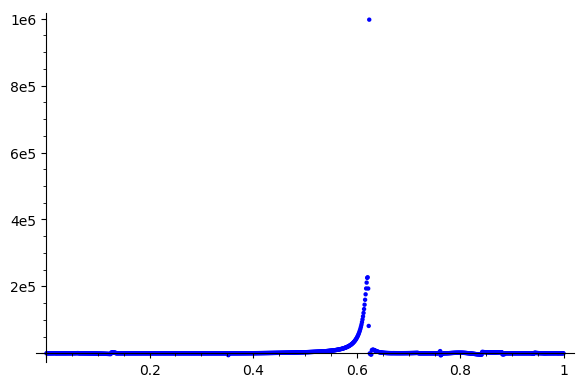

In [259]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a_2)
plt.show ()

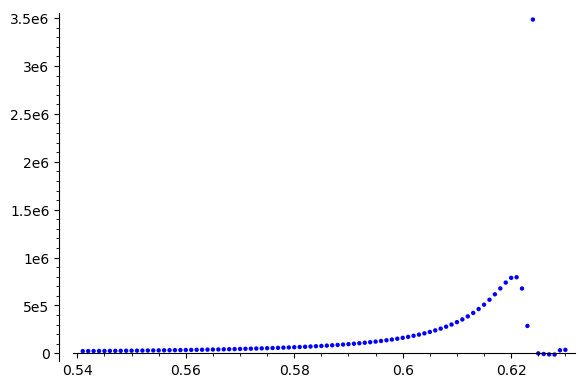

In [260]:
plt = sage.plot.graphics.Graphics()
plt += list_plot (fs_a[540:630])
plt.show ()

In [261]:
i = 1
for (g1,v) in fs_a:
    print(i, (g1, v.n()))
    i = i+1

1 (0.001, 2.01640535891056)
2 (0.002, -0.362710073590279)
3 (0.003, 147.736067295074)
4 (0.004, 231.973355174065)
5 (0.005, 0.125802472233772)
6 (0.006, 31.4474549293518)
7 (0.007, 224.126824885607)
8 (0.008, -196.814313560724)
9 (0.009000000000000001, 3.74174442887306)
10 (0.010000000000000002, 10.7710517644882)
11 (0.011, 25.6823604106903)
12 (0.012, 53.6789739131927)
13 (0.013000000000000001, 101.783222615719)
14 (0.014000000000000002, 179.064279317856)
15 (0.015, 296.848346948624)
16 (0.016, 468.893634080887)
17 (0.017, 711.601229548454)
18 (0.018000000000000002, 1044.11361038685)
19 (0.019000000000000003, -838.766079306602)
20 (0.02, -379.910890102386)
21 (0.021, 0.480319738388062)
22 (0.022000000000000002, 0.726589441299438)
23 (0.023, 1.07261443138123)
24 (0.024, 1.54639101028442)
25 (0.025, 2.18653702735901)
26 (0.026000000000000002, 3.03605914115906)
27 (0.027000000000000003, 4.14764332771301)
28 (0.028, 5.58132910728455)
29 (0.029, 7.40999031066895)
30 (0.030000000000000002, 

767 (0.767, -1573.40127563477)
768 (0.768, -326.192169189453)
769 (0.769, 0.566284179687500)
770 (0.77, 28.8437805175781)
771 (0.771, 97.5769042968750)
772 (0.772, 203.611999511719)
773 (0.773, 343.726654052734)
774 (0.774, 514.770172119141)
775 (0.775, 713.362213134766)
776 (0.776, 936.222412109375)
777 (0.777, 1179.94543457031)
778 (0.778, 1441.34417724609)
779 (0.779, 1717.03366088867)
780 (0.78, 2003.71243286133)
781 (0.781, 2298.25103759766)
782 (0.782, 2597.03137207031)
783 (0.783, 2897.38699340820)
784 (0.784, 3195.98947143555)
785 (0.785, 3489.77075195312)
786 (0.786, 3775.88363647461)
787 (0.787, 4051.51464843750)
788 (0.788, 4313.96533203125)
789 (0.789, 4560.41705322266)
790 (0.79, 4788.89929199219)
791 (0.791, 4997.14459228516)
792 (0.792, 5182.21023559570)
793 (0.793, 5343.17312622070)
794 (0.794, 5477.38131713867)
795 (0.795, 5583.44631958008)
796 (0.796, 5659.87921142578)
797 (0.797, 5705.06170654297)
798 (0.798, 5718.48989868164)
799 (0.799, 5699.19851684570)
800 (0.8, 

In [262]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ga_linspace = np.linspace(0.01, 0.99, 99)
ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
ra_linspace = np.linspace(1, a_val, 12)

ga_list = ga_linspace.tolist()
ra_list = ra_linspace.tolist()

ga_grid,ra_grid = np.meshgrid(ga_linspace, ra_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Ga = ga_list[ig]
        Ra = ra_list[ir]
        u[ir][ig] = calc_f_surf(Ra, Ga)

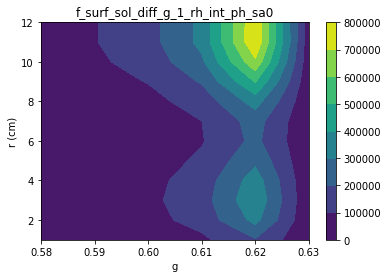

In [263]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,ra_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('r (cm)')
plt.show()

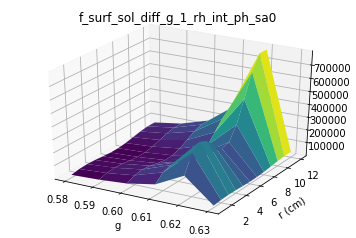

In [264]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('r (cm)')
ax.plot_surface(ga_grid,ra_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [265]:
g_values = []

if 1 < n_layers:
    g_values += [g[1] == 0.620]
    
#if 2 < n_layers:
#    g_values += [g[2] == 0.05]


In [266]:
disp_eq_b_s = disp_eq_b_d.subs(g_values)
disp_eq_b_s

0.0000248246060516314*cos(93237.6979189924*b)/sin(93237.6979189924*b) + 0.0000149571269039023*cos(91656.9598431588*b)/sin(91656.9598431588*b) == 0

In [267]:
disp_eq_brakes = [0]
for operand in disp_eq_b_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print("operand2", operand2)
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, 10*lambda_d)
            operand_denominator_roots.sort()
            print("operand_denominator_roots", operand_denominator_roots)
            #disp_eq_brakes += operand_denominator_roots
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes:
                    disp_eq_brakes += [rt]
            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            print ("")
    else:
        print("operand_denominator", operand_denominator)
        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
        operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, 10*lambda_d)
        operand_denominator_roots.sort()
        print("operand_denominator_roots", operand_denominator_roots)
        #disp_eq_brakes += operand_denominator_roots
        for rt in operand_denominator_roots:
            if rt not in disp_eq_brakes:
                disp_eq_brakes += [rt]
        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        #    M_det_num_factor_operands += (operand,)
        print ("")       

disp_eq_brakes.sort()

0.0000248246060516314*cos(93237.6979189924*b)/sin(93237.6979189924*b)
(b,)
operand_denominator sin(93237.6979189924*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(93237.6979189924*b)
operand_denominator_roots [3.369444673533592e-05, 6.738889352704443e-05, 0.00010108334043845151, 0.00013477778726383316, 0.0001684722340699199, 0.00020216668078298076, 0.0002358611276978816, 0.00026955557451187226, 0.000303250021310891, 0.00033694446813996775, 0.0003706389149538164, 0.0004043333617757104, 0.00043802780847756746, 0.0004717222553957709, 0.0005054167021088364, 0.0005391111489228303, 0.0005728055958377281, 0.0006065000426517142]

0.0000149571269039023*cos(91656.9598431588*b)/sin(91656.9598431588*b)
(b,)
operand_denominator sin(91656.9598431588*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(91656.9598431588*b)
operand_denominator_roots [3.427554938718722e-05, 6.855109866425865e-05, 0.0001028266481552

In [268]:
disp_eq_brakes

[0,
 3.369444673533592e-05,
 3.427554938718722e-05,
 6.738889352704443e-05,
 6.855109866425865e-05,
 0.00010108334043845151,
 0.00010282664815521327,
 0.00013477778726383316,
 0.00013710219744624927,
 0.0001684722340699199,
 0.00017137774683133187,
 0.00020216668078298076,
 0.00020565329631084942,
 0.0002358611276978816,
 0.00023992884569549758,
 0.00026955557451187226,
 0.00027420439508861873,
 0.000303250021310891,
 0.00030847994426991265,
 0.00033694446813996775,
 0.0003427554938506242,
 0.0003706389149538164,
 0.00037703104314175645,
 0.0004043333617757104,
 0.0004113065925268391,
 0.00043802780847756746,
 0.0004455821420059417,
 0.0004717222553957709,
 0.00047985769139101463,
 0.0005054167021088364,
 0.0005141332406820462,
 0.0005391111489228303,
 0.0005484087899489204,
 0.0005728055958377281,
 0.0005826843395462281,
 0.0006065000426517142,
 0.0006169598889684813]

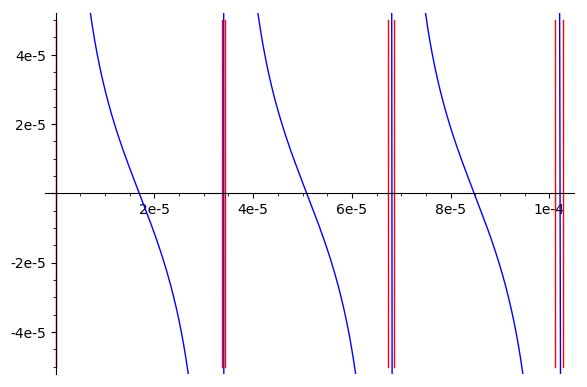

In [269]:
plt = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
plt += plot(disp_eq_b_s.lhs(), xeps, disp_eq_brakes[0])
disp_eq_brakes_plot_range = min(len(disp_eq_brakes), 7)
for i in range(disp_eq_brakes_plot_range-1):
    plt += plot (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)
for i in range(disp_eq_brakes_plot_range):
    plt += line ( [(disp_eq_brakes[i],-ylim), (disp_eq_brakes[i],ylim)], color = 'red')

plt.show()

In [270]:
b_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
        b_lst += find_root_recursive (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
b_lst.sort()

In [271]:
b_lst 

[1.6955305874107102e-05,
 3.405469760858492e-05,
 5.086601378231283e-05,
 6.810919850698814e-05,
 8.477701193242005e-05,
 0.00010216330594749799,
 0.00011868849324803957,
 0.00013621682457594673,
 0.0001526006500581538,
 0.00017026955877866566,
 0.000186513673848417,
 0.00020432131474072855,
 0.00022042775495931933,
 0.00023837189995678737,
 0.0002543430822662791,
 0.0002724211237467426,
 0.000288259842836254,
 0.00030646879714838886,
 0.0003221782215527654,
 0.00034051473499609023,
 0.00035609840070440076,
 0.0003745587540169045,
 0.0003900205595339363,
 0.0004086006750402338,
 0.00042394487374628744,
 0.00044264032291834154,
 0.0004578715149749766,
 0.00047667752719082984,
 0.0004918006502079002,
 0.0005107121226994965,
 0.0005257324411745877,
 0.0005447439502370149,
 0.0005596670436986477,
 0.0005787728572244403,
 0.0005936046070204743,
 0.0006127986985035958]

In [272]:
b_lst, h_val

([1.6955305874107102e-05,
  3.405469760858492e-05,
  5.086601378231283e-05,
  6.810919850698814e-05,
  8.477701193242005e-05,
  0.00010216330594749799,
  0.00011868849324803957,
  0.00013621682457594673,
  0.0001526006500581538,
  0.00017026955877866566,
  0.000186513673848417,
  0.00020432131474072855,
  0.00022042775495931933,
  0.00023837189995678737,
  0.0002543430822662791,
  0.0002724211237467426,
  0.000288259842836254,
  0.00030646879714838886,
  0.0003221782215527654,
  0.00034051473499609023,
  0.00035609840070440076,
  0.0003745587540169045,
  0.0003900205595339363,
  0.0004086006750402338,
  0.00042394487374628744,
  0.00044264032291834154,
  0.0004578715149749766,
  0.00047667752719082984,
  0.0004918006502079002,
  0.0005107121226994965,
  0.0005257324411745877,
  0.0005447439502370149,
  0.0005596670436986477,
  0.0005787728572244403,
  0.0005936046070204743,
  0.0006127986985035958],
 0)

In [273]:
b_sol = b_lst[h_val]

In [274]:
b_sol, h_val

(1.6955305874107102e-05, 0)

In [275]:
h_s = []
for i in range(n_layers):
    h_s += [b_s[i].subs(digit_values).subs(b == b_sol).subs(g_values)]
    
h_s

[h_0 == (6.44301623216070e-6), h_1 == 0.0000105122896419464]

In [276]:
h_sol = [0]
for i in range(n_layers):
    h_sol += [h_sol[i] + h_s[i].rhs()]
h_sol

[0, 6.44301623216070e-6, 0.0000169553058741071]

In [277]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda r,p,z, a0, i=i: E_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [278]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda r,p,z, a0, i=i: E_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [279]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda r,p,z, a0, i=i: E_z_s[i](r,p,z)
                .subs(digit_values)
                .subs(g_values)
                .subs(b == b_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
               ]

In [280]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda r,p,z, a0, i=i: H_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [281]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda r,p,z, a0, i=i: H_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [282]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda r,p,z, a0, i=i: H_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [283]:
display(Math(latex(E_rho_s [1](rho,ph,z))))

<IPython.core.display.Math object>

In [284]:
[E_rho_s [0](rho,ph,z,1) for rho in [1..int(a_val)]]

[-1/2*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*cos(k_1*z)*sin(-b*(g_1 - 1)*k_1 + b*g_1*k_1)/(epsilon_1*cos(-b*(g_1 - 1)*k_1 + b*g_1*k_1)*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*sin(k_1*z)/(epsilon_1*cos(b*g_1*k_1)))*k_1*(bessel_J(m + 1, kappa) - bessel_J(m - 1, kappa))*cos(m*ph)/kappa,
 -1/2*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*cos(k_1*z)*sin(-b*(g_1 - 1)*k_1 + b*g_1*k_1)/(epsilon_1*cos(-b*(g_1 - 1)*k_1 + b*g_1*k_1)*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*cos(-b*(g_1 - 1)*k_0)*sin(k_1*z)/(epsilon_1*cos(b*g_1*k_1)))*k_1*(bessel_J(m + 1, 2*kappa) - bessel_J(m - 1, 2*kappa))*cos(m*ph)/kappa,
 -1/2*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1

In [285]:
if E_mode:
    print([E_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

[0.15762828306526228*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.3033050405041734*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.4260856098139587*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.5169499897577593*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.569550612145736*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.580724582115148*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.5507262592198588*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.4831613727143143*(1.33628911642579*a0*cos(147833.806198643*z) - 0.984631025175588*a0*sin(147833.806198643*z))*cos(ph), 0.3846307907730269*(1.3362891164

In [286]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

[108180.040652834*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 104078.884112333*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 97473.9593997383*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 88695.4895085714*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 78176.3363498189*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 66425.0599360039*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 53994.6511704925*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*sin(ph),
 41449.1104687039*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.8061986

In [287]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

[105410.792457314*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 93282.1462122996*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 74205.6763915814*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 49782.4965881228*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 22052.4777111812*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 -6685.26043050551*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 -34073.7766173529*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.806198643*z))*cos(ph),
 -57903.4452752704*pi*(1.33628911642579*I*a0*cos(147833.806198643*z) - 0.984631025175588*I*a0*sin(147833.8061

In [288]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

In [289]:
digit_values

[m == 1,
 a == 12,
 mu_0 == 1,
 epsilon_0 == 6.09102400000000,
 sigma_0 == 9,
 mu_1 == 1,
 epsilon_1 == 2.21116900000000,
 sigma_1 == 9]

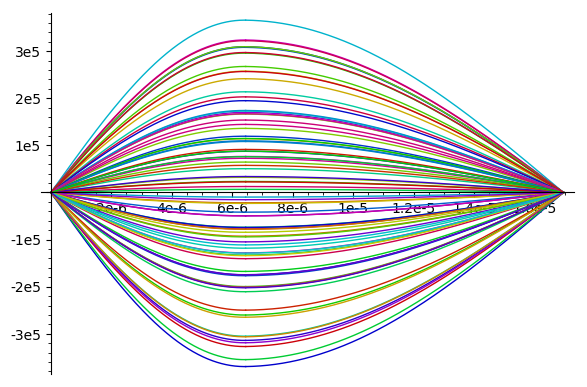

In [290]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

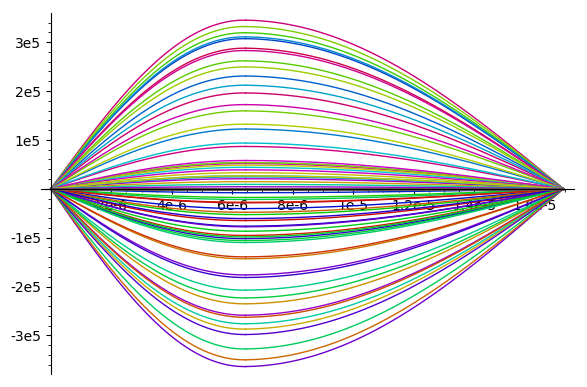

In [291]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

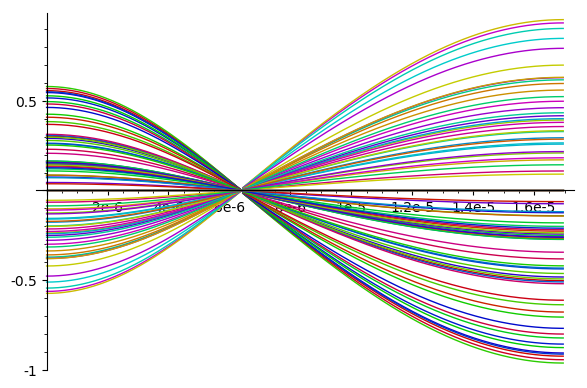

In [292]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

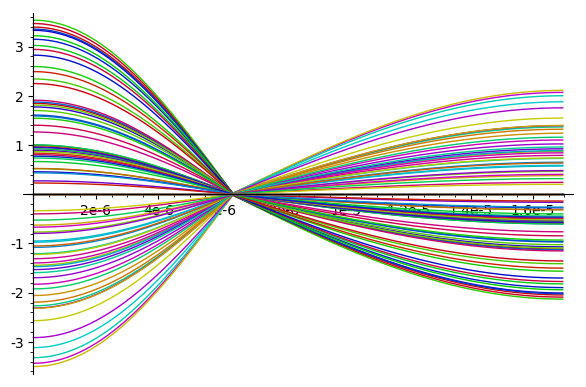

In [293]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

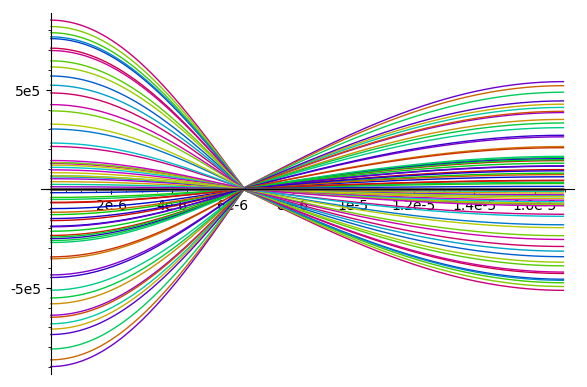

In [294]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

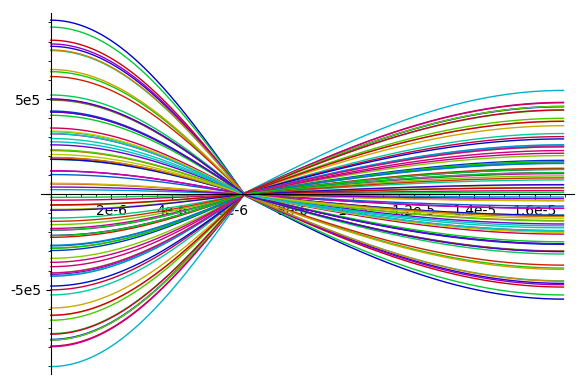

In [295]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

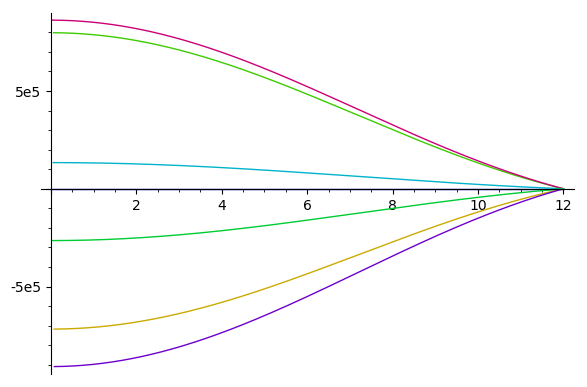

In [296]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

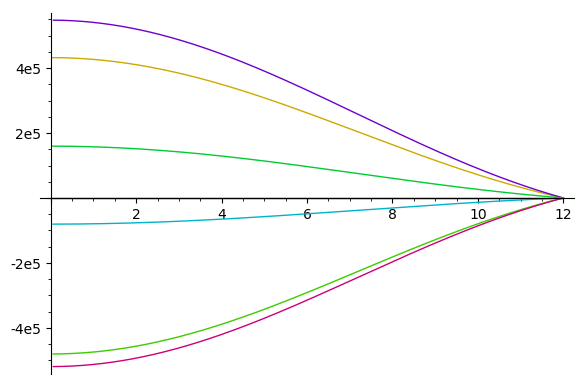

In [297]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

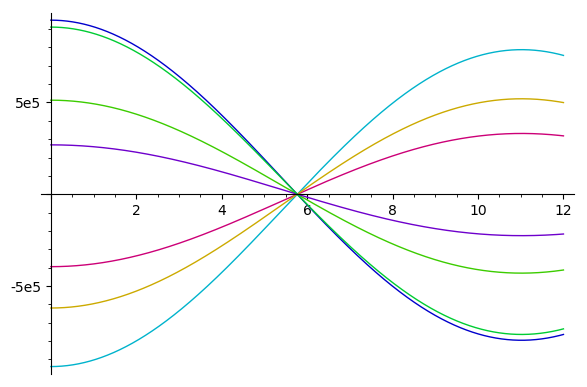

In [298]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

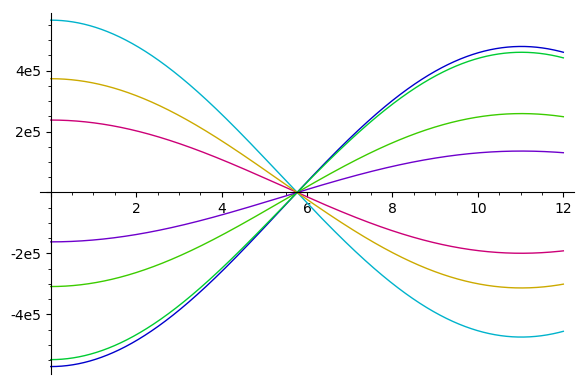

In [299]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

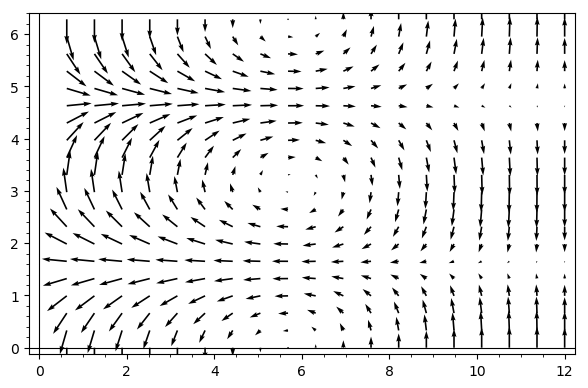

In [300]:
if E_mode:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1).imag_part(),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1).imag_part()),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()
else:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1)),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()

In [301]:
if E_mode:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        name='H1')

    print(H1.display())
    #H1.plot()
else:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1),
        name='H1')

    print(H1.display())
    #H1.plot()


H1 = -1.13916582608410e6*pi*real_part(bessel_J(1, 0.31930883085062933*rho))*sin(phi)/rho e_rho + (181872.854035953*pi*cos(phi)*real_part(bessel_J(2, 0.31930883085062933*rho)) - 181872.854035953*pi*cos(phi)*real_part(bessel_J(0, 0.31930883085062933*rho))) e_phi


In [302]:
def get_integrand_view(f):
    return f(x)

#class my_dummy_integral:
#    f = None
#    a = None
#    b = None
#    def __init__(self, f, a, b):
#        print ("my_dummy_integral ", f, a, b)
#        self.f = f
#        self.a = a
#        self.b = b

def num_int(f, a, b):
    from scipy import integrate
    
    #try:
    #    print ("integrand = ", get_integrand_view(f))
    #except Exception as ex1:
    #    print ("Exception ex1 = ", ex1)
    #print ("a, b = ", a, b)
    
    #to_call_integration = True

    #if type(f) is my_dummy_integral:
    #    to_call_integration = False

    #import inspect
    #stack = inspect.stack()
    #for frame in stack:
    #    func_name = frame[3]
    #    #print ("func_name = ", func_name)
    #    if ('get_integrand_view' == func_name):
    #        to_call_integration = False
    #        break;

    #if not to_call_integration:
    #    return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a, b = ", a, b)

        import inspect
        stack = inspect.stack()
        for frame in stack:
            func_name = frame[3]
            print ("func_name = ", func_name)
            #if ('get_integrand_view' == func_name):
                #to_call_integration = False
                #break;

        
        raise ex

In [303]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda r,p,z, a0, i=i: E2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [304]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda r,p,z, a0, i=i: E2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [305]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda r,p,z, a0, i=i: E2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [306]:
E2_8pi_rho_sol[0](r,p,z, a0)

1/64*(768417.091037159*a0*bessel_J(2, 0.31930883085062933*r)*cos(p)*sin(245362.362944717*z) - 768417.091037159*a0*bessel_J(0, 0.31930883085062933*r)*cos(p)*sin(245362.362944717*z))^2/pi

In [307]:
E2_8pi_phi_sol[0](r,p,z, a0)

3.61953007652467e11*a0^2*bessel_J(1, 0.31930883085062933*r)^2*sin(p)^2*sin(245362.362944717*z)^2/(pi*r^2)

In [308]:
E2_8pi_z_sol[0](r,p,z, a0)

1/16*a0^2*bessel_J(1, 0.31930883085062933*r)^2*cos(p)^2*cos(245362.362944717*z)^2/pi

In [309]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

1/16*a0^2*bessel_J(1, 0.31930883085062933*rh)^2*cos(ph)^2*cos(245362.362944717*z)^2/pi


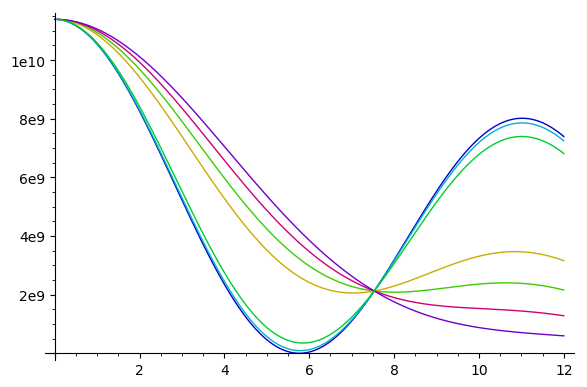

In [310]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
                (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

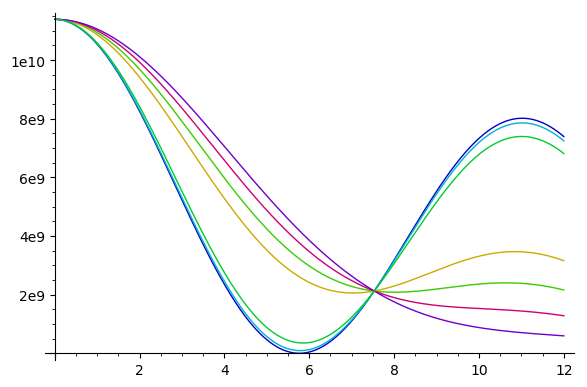

In [311]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [312]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_rho_sol[i](r,p,z, a0) * r]

In [313]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_phi_sol[i](r,p,z, a0) * r]

In [314]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_z_sol[i](r,p,z, a0) * r]

In [315]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

1/64*(768417.091037159*bessel_J(2, 0.31930883085062933*rh)*cos(ph)*sin(245362.362944717*z) - 768417.091037159*bessel_J(0, 0.31930883085062933*rh)*cos(ph)*sin(245362.362944717*z))^2*rh/pi

In [316]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

3.61953007652467e11*bessel_J(1, 0.31930883085062933*rh)^2*sin(ph)^2*sin(245362.362944717*z)^2/(pi*rh)

In [317]:
print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

1/16*rh*bessel_J(1, 0.31930883085062933*rh)^2*cos(ph)^2*cos(245362.362944717*z)^2/pi


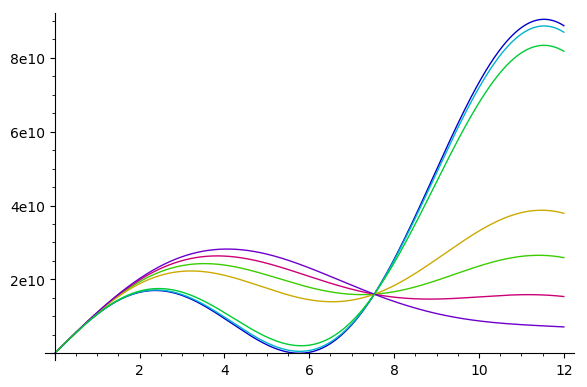

In [318]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
                (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

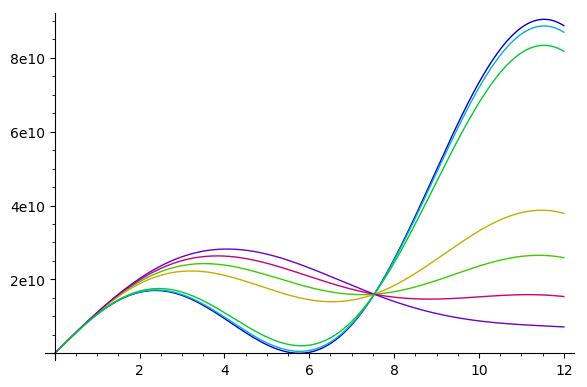

In [319]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [320]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [321]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [322]:
E2_8pi_rho_sol_rh[1](r,p,z, a0)

1/64*(-455865.100145232*a0*bessel_J(2, 0.31930883085062933*r)*cos(p)*cos(147833.806198643*z) + 455865.100145232*a0*bessel_J(0, 0.31930883085062933*r)*cos(p)*cos(147833.806198643*z) - 618675.987559700*a0*bessel_J(2, 0.31930883085062933*r)*cos(p)*sin(147833.806198643*z) + 618675.987559700*a0*bessel_J(0, 0.31930883085062933*r)*cos(p)*sin(147833.806198643*z))^2*r/pi

In [323]:
if 1 < n_layers:
    print([E2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [324]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [325]:
[E2_8pi_phi_sol_rh_int_ph [0](r,h_sol[1], 1) for r in [1..int(a_val)]]

[8992415701.228094,
 16647052333.180008,
 21901838102.204735,
 24179379731.51213,
 23480250539.55586,
 20342168853.030724,
 15681283780.27401,
 10560938436.57511,
 5949132903.281507,
 2524669088.6424475,
 574822985.1537954,
 7.701721114100238e-18]

In [326]:
if 1 < n_layers:
    print([E2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[1], 1) for rho in [1..int(a_val)]])

[8992460313.018557, 16647134919.977062, 21901946758.237183, 24179499686.534004, 23480367026.16545, 20342269771.47184, 15681361575.848576, 10560990829.87946, 5949162417.205169, 2524681613.6426387, 574825836.8772275, 7.701759322695121e-18]


In [327]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [328]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]])

[0.0015529172263814034, 0.011499243449404783, 0.034040427541974956, 0.06680932297763686, 0.10137121868611956, 0.12646539010230498, 0.13269349301000585, 0.11672245604159028, 0.08321672543100976, 0.04359898662302787, 0.012011339110229469, 1.915235631344652e-28]


In [329]:
if E_mode:
    if 1 < n_layers:
        print([E2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.004278546075989874, 0.03168233444866131, 0.09378705780997236, 0.1840708325012187, 0.2792946221212723, 0.3484332515465651, 0.36559271426866913, 0.32158984251874817, 0.22927596397345076, 0.12012248300430395, 0.0330932434417043, 5.276793737538889e-28]


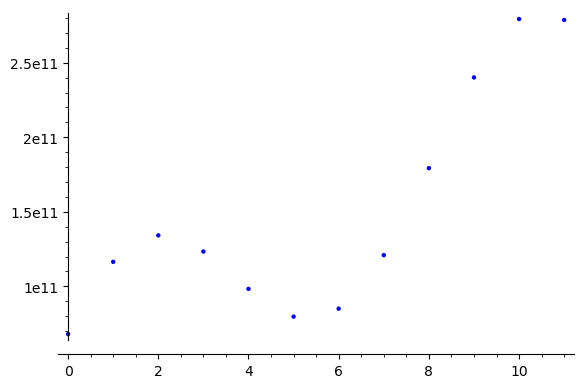

In [330]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)])
            for rho in [1..int(a_val)] ])
plt.show ()

In [331]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [332]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [333]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [334]:
f_dielectric_surf_rho = []
for i in range(n_layers - 1):
    f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, h_sol[i+1], 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [335]:
f_dielectric_surf_phi = []
for i in range(n_layers - 1):
    f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [336]:
f_dielectric_surf_z = []
for i in range(n_layers - 1):
    epsilon_d[i]*E_z_sol[i](rh,ph,z,1)
    f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1])*E2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i+1]/epsilon_d[i])*E2_8pi_z_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [337]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol[1], 1))

0.7299680887200702
7.412808084597002e-05


In [338]:
if E_mode:
    if 1 < n_layers:
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[1], 1))
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[2], 1))

0.0005624960847223924
2.0111838857430593


In [339]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [340]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [341]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [342]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda r,p,z, a0, i=i: H2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [343]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda r,p,z, a0, i=i: H2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [344]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda r,p,z, a0, i=i: H2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [345]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

2.23379212265464e11*pi*a0^2*bessel_J(1, 0.31930883085062933*rh)^2*cos(245362.362944717*z)^2*sin(ph)^2/rh^2

In [346]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

1/64*(603659.859757534*pi*a0*bessel_J(2, 0.31930883085062933*rh)*cos(ph)*cos(245362.362944717*z) - 603659.859757534*pi*a0*bessel_J(0, 0.31930883085062933*rh)*cos(ph)*cos(245362.362944717*z))^2/pi

In [347]:
H2_8pi_z_sol[0](rh,ph,z, a0)

0

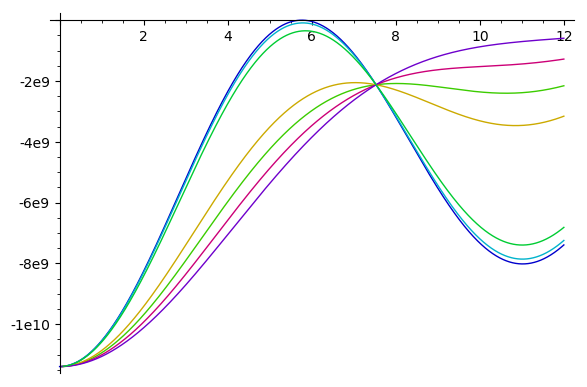

In [348]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) ))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

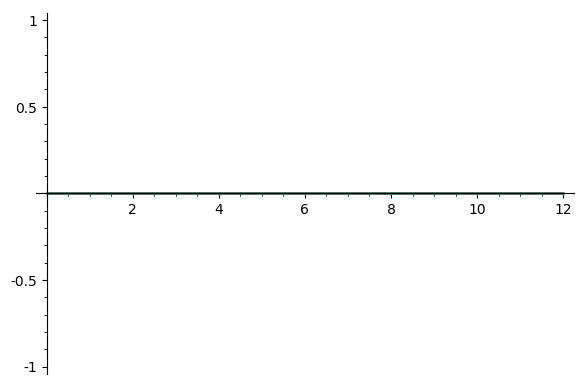

In [349]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(1.0-epsilon[0]).subs(digit_values) * 
            (E2_8pi_rho_sol[0](rh,ph,h_sol[0],1) + 
             E2_8pi_phi_sol[0](rh,ph,h_sol[0],1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))

plt += plot ([(epsilon[n_layers - 1] - 1.0).subs(digit_values) * 
            (E2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             E2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

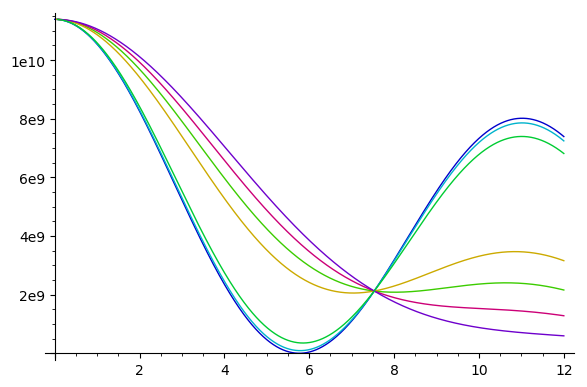

In [350]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

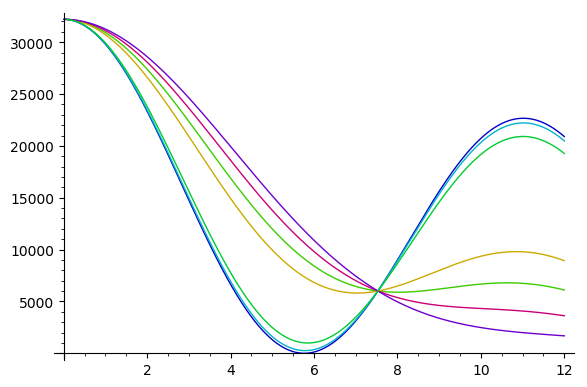

In [351]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [352]:
((H2_8pi_rho[n_layers - 1](rh,ph,b_sol,1) + 
 H2_8pi_phi[n_layers - 1](rh,ph,b_sol,1) +
 H2_8pi_z  [n_layers - 1](rh,ph,b_sol,1) )
-
(H2_8pi_rho[0](rh,ph,0,1) + 
 H2_8pi_phi[0](rh,ph,0,1) +
 H2_8pi_z  [0](rh,ph,0,1) )
+
sum([(epsilon[i]-epsilon[i+1]) * 
(E2_8pi_rho[i](rh,ph,h_sol[i+1],1) + 
 E2_8pi_phi[i](rh,ph,h_sol[i+1],1) )
for i in range(n_layers - 1)]))

-1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rh)^2*sin(m*ph)^2/(pi*c^2*kappa^4*rh^2) + 1/64*(4*D_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rh)^2*sin(m*ph)^2*sin((6.44301623216070e-6)*k_0)^2/(pi*kappa^4*rh^2) + (D_z_0*k_0*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin((6.44301623216070e-6)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin((6.44301623216070e-6)*k_0)/kappa)^2/pi)*(epsilon_0 - epsilon_1) + 1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)*cos((1.6955305874107102e-05)*k_1)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*rh)*cos(m*ph)*cos((1.6955305874107102e-05)*k_1)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin((h_0 + h_1)*k_1)*sin((1.6955305874107102e-05)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin((h_0 + h_1)*k_1)*sin((1.6955305874107102e-05)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi - 1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)/(c*kappa)

In [353]:
((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
 H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
 H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
-
(H2_8pi_rho_sol[0](rh,ph,0,1) + 
 H2_8pi_phi_sol[0](rh,ph,0,1) +
 H2_8pi_z_sol  [0](rh,ph,0,1) )
+
sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
(E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
 E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
for i in range(n_layers - 1)]))

-1.42273038558096e11*pi*bessel_J(1, 0.31930883085062933*rh)^2*sin(ph)^2/rh^2 - 1/64*(603659.859757534*pi*bessel_J(2, 0.31930883085062933*rh)*cos(ph) - 603659.859757534*pi*bessel_J(0, 0.31930883085062933*rh)*cos(ph))^2/pi + 1/64*(-363745.708071907*pi*bessel_J(2, 0.31930883085062933*rh)*cos(ph) + 363745.708071907*pi*bessel_J(0, 0.31930883085062933*rh)*cos(ph))^2/pi + 0.0606227343750000*(768378.073762772*bessel_J(2, 0.31930883085062933*rh)*cos(ph) - 768378.073762772*bessel_J(0, 0.31930883085062933*rh)*cos(ph))^2/pi + 1.40418257762630e12*bessel_J(1, 0.31930883085062933*rh)^2*sin(ph)^2/(pi*rh^2)

In [354]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_rho_sol[i](r,p,z, a0) * r]

In [355]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_phi_sol[i](r,p,z, a0) * r]

In [356]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_z_sol[i](r,p,z, a0) * r]

In [357]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

2.23379212265464e11*pi*bessel_J(1, 0.31930883085062933*rh)^2*cos(245362.362944717*z)^2*sin(ph)^2/rh

In [358]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

1/64*(603659.859757534*pi*bessel_J(2, 0.31930883085062933*rh)*cos(ph)*cos(245362.362944717*z) - 603659.859757534*pi*bessel_J(0, 0.31930883085062933*rh)*cos(ph)*cos(245362.362944717*z))^2*rh/pi

In [359]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

0

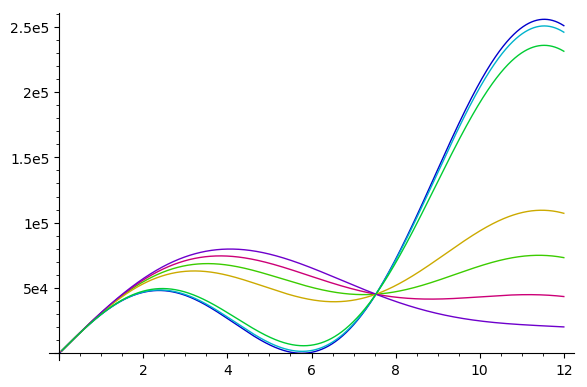

In [360]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol_rh[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol_rh  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol_rh[0](rh,ph,0,1) + 
             H2_8pi_phi_sol_rh[0](rh,ph,0,1) +
             H2_8pi_z_sol_rh  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [361]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [362]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[54778582605.91362,
 101407893237.57907,
 133418170107.40714,
 147292139730.76248,
 143033294558.76355,
 123917222459.70065,
 95524776374.29504,
 64333462527.192825,
 36239991455.40599,
 15379381783.463333,
 3501616186.596526,
 4.691613246914637e-17]

In [363]:
if 1 < n_layers:
    print([H2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[19889412229.63349, 36819926620.794556, 48442454294.22838, 53479917623.38248, 51933584673.195366, 44992780072.153854, 34683841112.14299, 23358668579.805183, 13158283675.217838, 5584059491.440658, 1271392659.1751022, 1.70346557816596e-17]


In [364]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [365]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[52009977591.19563,
 81459842318.9092,
 77323592063.5506,
 46401267797.79605,
 11381547049.33272,
 1255175405.8579628,
 38041277583.4628,
 125549592492.01637,
 245264522851.02353,
 361612397174.3127,
 434987712498.021,
 437559348378.7504]

In [366]:
if 1 < n_layers:
    print([H2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[18884166678.924183, 29577041007.02344, 28075220724.348347, 16847714915.287945, 4132496138.2025447, 455738353.9330843, 13812307942.369555, 45585473036.07371, 89052453864.72903, 131296899127.31363, 157938550380.90103, 158872278924.12228]


In [367]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [368]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [369]:
if 1 < n_layers:
    print([H2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


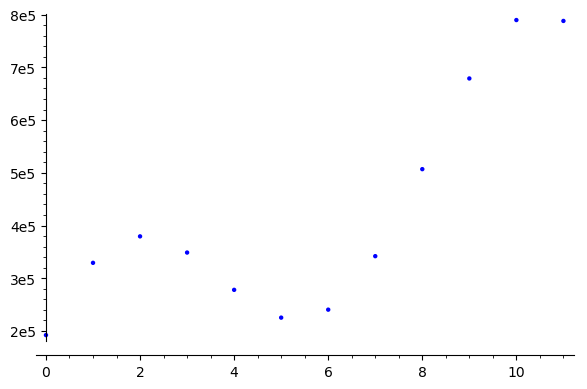

In [370]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([
    ((H2_8pi_rho_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) + 
     H2_8pi_phi_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) +
     H2_8pi_z_sol_rh_int_ph  [n_layers - 1](rho,b_sol,1) )
    -
    (H2_8pi_rho_sol_rh_int_ph[0](rho,0,1) + 
     H2_8pi_phi_sol_rh_int_ph[0](rho,0,1) +
     H2_8pi_z_sol_rh_int_ph  [0](rho,0,1) )
    +
    sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
    (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
     E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)]))
    for rho in [1..int(a_val)] ])
plt.show ()

In [371]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [372]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [373]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [374]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_rho

923517261624.5479

In [375]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_phi

1701838828648.01

In [376]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_z

0.0

In [377]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_rho

335317466130.4575

In [378]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_phi

617916207414.296

In [379]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_z

0.0

In [380]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [381]:
surf_f_z

-1672122416727.8042

In [382]:
f_dielectric_surf_rho

[1.08392568587204e12]

In [383]:
f_dielectric_surf_phi

[5.88201458546048e11]

In [384]:
f_dielectric_surf_z

[0.000792257985652764]

In [385]:
f_dielectric_surf = 0
print(f_dielectric_surf)
for i in range(n_layers - 1):
    f_dielectric_surf += f_dielectric_surf_rho[i] + f_dielectric_surf_phi[i] + f_dielectric_surf_z[i]
    print(f_dielectric_surf)

0
1.67212714441809e12


In [386]:
sum_surf_f_z = surf_f_z + f_dielectric_surf

In [387]:
sum_surf_f_z

4.72769028515625e6

In [388]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [389]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [390]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [391]:
ED_8pi_rho = []
for i in range(n_layers):
    ED_8pi_rho += [epsilon[i].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i], h_sol[i+1], 1)]

In [392]:
#ED_8pi_rho_0 + ED_8pi_rho_1
sum(ED_8pi_rho)

8.73034458543753e6

In [393]:
ED_8pi_phi = []
for i in range(n_layers):
    ED_8pi_phi += [epsilon[i].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [394]:
#ED_8pi_phi_0 + ED_8pi_phi_1
sum(ED_8pi_phi)

4.73759546959399e6

In [395]:
ED_8pi_z = []
for i in range(n_layers):
    ED_8pi_z += [epsilon[i].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [396]:
#ED_8pi_z_0 + ED_8pi_z_1
sum(ED_8pi_z)

0.0000378582735572475

In [397]:
HB_8pi_rho = []
for i in range(n_layers):
    HB_8pi_rho += [mu[i].subs(digit_values) * H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [398]:
#H2_8pi_rho_0 + H2_8pi_rho_1
sum(HB_8pi_rho)

4737595.563687287

In [399]:
HB_8pi_phi = []
for i in range(n_layers):
    HB_8pi_phi += [mu[i].subs(digit_values) * H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [400]:
#H2_8pi_phi_0 + H2_8pi_phi_1
sum(HB_8pi_phi)

8730344.758830734

In [401]:
HB_8pi_z = []
for i in range(n_layers):
    HB_8pi_z += [mu[i].subs(digit_values) * H2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [402]:
#H2_8pi_z_0 + H2_8pi_z_1
sum(HB_8pi_z)

0.0

In [403]:
field_energy = sum(HB_8pi_rho) + sum(HB_8pi_phi) + sum(HB_8pi_z) \
             + sum(ED_8pi_rho) + sum(ED_8pi_phi) + sum(ED_8pi_z)
field_energy

2.69358803775874e7

In [404]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [405]:
# Abraham force
# Minkovsky form without dissipation
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [406]:
Abraham_Minkovsky_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z += [lambda r,p,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re(E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im(E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re(E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im(E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [407]:
print(Abraham_Minkovsky_f_z[0](rh, ph, z))

1/32*((D_z_0*k_0*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa - D_z_0*k_0*omega*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa)*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa)) - (D_z_0*epsilon_0*omega^2*bessel_J(m + 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega^2*bessel_J(m - 1, kappa*rh)*cos(m*ph)*cos(k_0*z)/(c*kappa))*(D_z_0*k_0*bessel_J(m + 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*rh)*cos(m*ph)*sin(k_0*z)/kappa))*(epsilon_0*mu_0 - 1)/(pi*c)


In [408]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [409]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [410]:
Abraham_Minkovsky_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z_s += [lambda r,p,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re(E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im(E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re(E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im(E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [411]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [412]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [413]:
# Abraham force
# Abraham form with dissipation
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E x H]).diff(t)
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (mu) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re((epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (mu) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(H_ph) + Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(H_ph) 
#        - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(H_rh) - Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(H_rh)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(-I*omega * H_ph) + Im((epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(-I*omega * H_ph)
#        - Re((epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(-I*omega * H_rh) - Im((epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(-I*omega * H_rh)) 
#       )


In [414]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [415]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [416]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [417]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [418]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [419]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [420]:
calc_Abraham_force = False

In [421]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda r,p,z, a0, i=i: Abraham_f_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [422]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [1..int(a_val)]]

In [423]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [1..int(a_val)]]

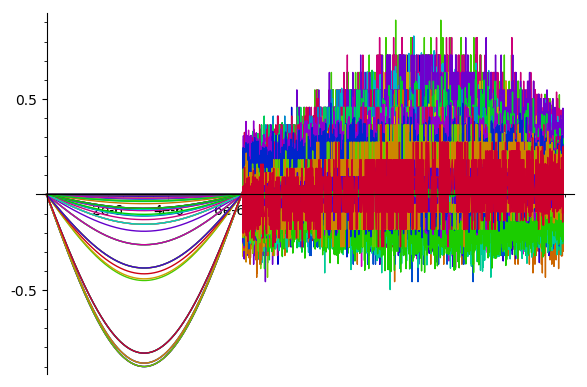

In [424]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

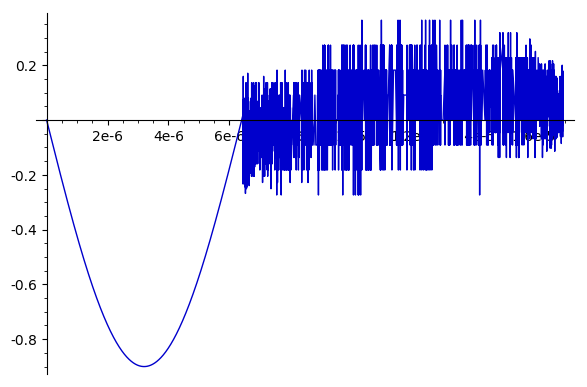

In [425]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [426]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[-0.573058751998357*pi*cos(245362.362944717*z)*sin(245362.362944717*z)]

In [427]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[-0.573058751998357*pi*cos(245362.362944717*z)*sin(245362.362944717*z)]

In [428]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[-1/959335865600*((235884.841108093*pi*cos(147833.806198643*z) - 173809.342655483*pi*sin(147833.806198643*z))*(-7.70313623304698e20*pi*cos(147833.806198643*z) - 1.04542888121265e21*pi*sin(147833.806198643*z)) - (2.23786380761818e20*pi^2*cos(147833.806198643*z) - 1.64894715373580e20*pi^2*sin(147833.806198643*z))*(-811958.735013556*cos(147833.806198643*z) - 1.10194742278406e6*sin(147833.806198643*z)))/pi]

In [429]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[-1/959335865600*((235884.841108093*pi*cos(147833.806198643*z) - 173809.342655483*pi*sin(147833.806198643*z))*(-7.70313623304698e20*pi*cos(147833.806198643*z) - 1.04542888121265e21*pi*sin(147833.806198643*z)) - (2.23786380761818e20*pi^2*cos(147833.806198643*z) - 1.64894715373580e20*pi^2*sin(147833.806198643*z))*(-811958.735013556*cos(147833.806198643*z) - 1.10194742278406e6*sin(147833.806198643*z)))/pi]

In [430]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda r,p,z, a0, i=i: Abraham_f_z_sol[i](r,p,z, a0) * r]

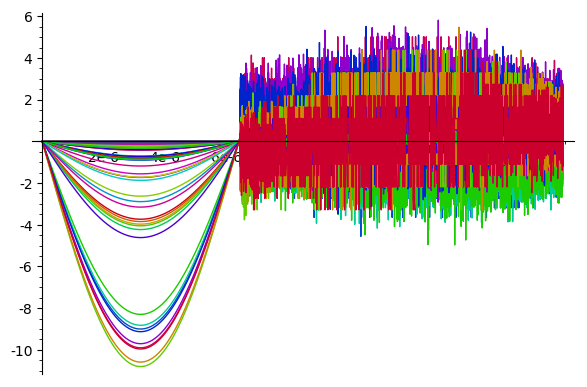

In [431]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [432]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda r,z,a0, i=i: 
                                  num_int(
                                      lambda p : Abraham_f_z_sol_rh[i](r,p,z,a0), 
                                      0, 2*pi)
                                 ]

In [433]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : Abraham_f_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [434]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [435]:
if calc_Abraham_force:
    Abraham_f_z = []
    for i in range(n_layers):
        Abraham_f_z += [Abraham_f_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [436]:
if calc_Abraham_force:
    print(Abraham_f_z)

In [437]:
if calc_Abraham_force:
    print(sum(Abraham_f_z))

In [438]:
#Abraham_f_z_0 + Abraham_f_z_1

In [439]:
sum_f_z = sum_surf_f_z
if calc_Abraham_force:
    sum_f_z += sum(Abraham_f_z)

In [440]:
sum_f_z

4.72769028515625e6

In [441]:
sum_f_z / (field_energy)

0.175516456818320

In [442]:
S = pi.n() * a_val^2
S

452.389342116930

In [443]:
V = b_sol * S
V

0.00767039966977863

In [444]:
h_sol

[0, 6.44301623216070e-6, 0.0000169553058741071]

In [445]:
# мкм
b_sol*10*1000 

0.16955305874107102

In [446]:
field_energy

2.69358803775874e7

In [447]:
# эрг / куб см
(field_energy)/V

3.51166582410493e9

In [448]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

https://iopscience.iop.org/article/10.1088/1367-2630/18/5/053042

A uniform electric field $E={10}^{6}$ V m−1 along the $z$ direction is applied. This electric field corresponds to an average laser intensity of ${I}_{0}=1.33\ \mathrm{mW}\;\mu {{\rm{m}}}^{-2}$ as used under typical experiment conditions

In [449]:
# 1.33 мВт / 1 мкм^2
# 1.33 * 10^4 эрг в сек / 0.0001 см
w = (1.33 * 10^4 /(0.0001^2*c)).subs(c_value)
w # эрг в куб см

44.3640246613542

In [450]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

7.78661641876146

In [451]:
# Ньютон
F_z / 10^5

0.0000778661641876146

In [452]:
# gramm
F_z / 10^5 *101

0.00786448258294907

In [453]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

0.0716031809173835

In [454]:
omega_value[0].rhs().n()

2.98046134067856e15

In [455]:
# число ячеек в #сантиметре
nLayers_per_sm = 1/(15e-06 + b_sol)
nLayers_per_sm

31293.7076534224

In [456]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

2.24072901068372

In [457]:
# кг / см толщины
1.0/(15e-06 + b_sol) * F_z / 10^5 *101/1000

0.246108818796241